In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import math
from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



In [2]:
plt.rcParams.update({
    "font.size" : 14,                   # Set font size to 11pt
    "axes.labelsize": 14,               # -> axis labels
    "legend.fontsize": 12,              # -> legends
    "text.usetex": True,
    "text.latex.preamble": (r'\usepackage{lmodern}'), # LaTeX preamble
    "font.family": 'Latin Modern Roman',
})

# Computing the visibility amplitude

In [3]:
%time !python3 lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  25000000
Number of points in the n=1 grid  1960000
Number of points in the n=2 grid  5760000
File  ./Results/LensingBands_a_0.94_i_17.h5  created.
CPU times: user 784 ms, sys: 226 ms, total: 1.01 s
Wall time: 56.1 s


### Reading the output of the lensing bands calculation

In [4]:
%time !python3 raytracing.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.94_i_17.h5  created.

A total of 32720000 photons were ray-traced
CPU times: user 5.54 s, sys: 1.53 s, total: 7.07 s
Wall time: 6min 18s


In [5]:
%time !python3 radialintensity.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Intensity
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Rays_a_0.94_i_17.h5
File  ./Results/Intensity_a_0.94_i_17.h5  created.
CPU times: user 217 ms, sys: 70.9 ms, total: 288 ms
Wall time: 14.6 s


In [6]:
%time !python3 visamp.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Visamp
Reading file:  ./Results/LensingBands_a_0.94_i_17.h5
Reading file:  ./Results/Intensity_a_0.94_i_17.h5
File  ./Results/Visamp_0_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_5_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_10_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_15_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_20_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_25_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_30_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_35_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_40_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_45_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_50_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_55_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_60_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_65_a_0.94_i_17_0.h5  created.
File  ./Results/Visamp_70_a_0.94_i_17_0.h5  created.
File  ./Re

### Reading the resulting visamp file

In [7]:
freqss = []
visamps = []
for i in range(len(radonangles)):
    fnrays="./Results/Visamp_%s_a_%s_i_%s_0.h5"%(radonangles[i],spin_case,i_case)

    print("Reading file: ",fnrays)

    h5f = h5py.File(fnrays,'r')

    freqs=h5f['freqs'][:]
    visamp=h5f['visamp'][:]

    h5f.close()
    freqss.append(freqs)
    visamps.append(visamp)
freqss=np.array(freqss)
visamps=np.array(visamps)

Reading file:  ./Results/Visamp_0_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_5_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_10_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_15_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_20_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_25_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_30_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_35_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_40_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_45_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_50_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_55_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_60_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_65_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_70_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_75_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_80_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_85_a_0.94_i_17_0.h5
Reading file:  ./Results/Visamp_90_a_0.94_i_17_0.h5
Reading file: 

# Analysis of the $\varphi=0^\circ$ visibility amplitude

Before analysing across all the different values of $\varphi$ to find the shape of the photon ring, we demonstrate the relevant methods for the $\varphi=0^\circ$ visibility amplitudes

### Plotting the visibility amplitude for $\varphi=0^\circ$

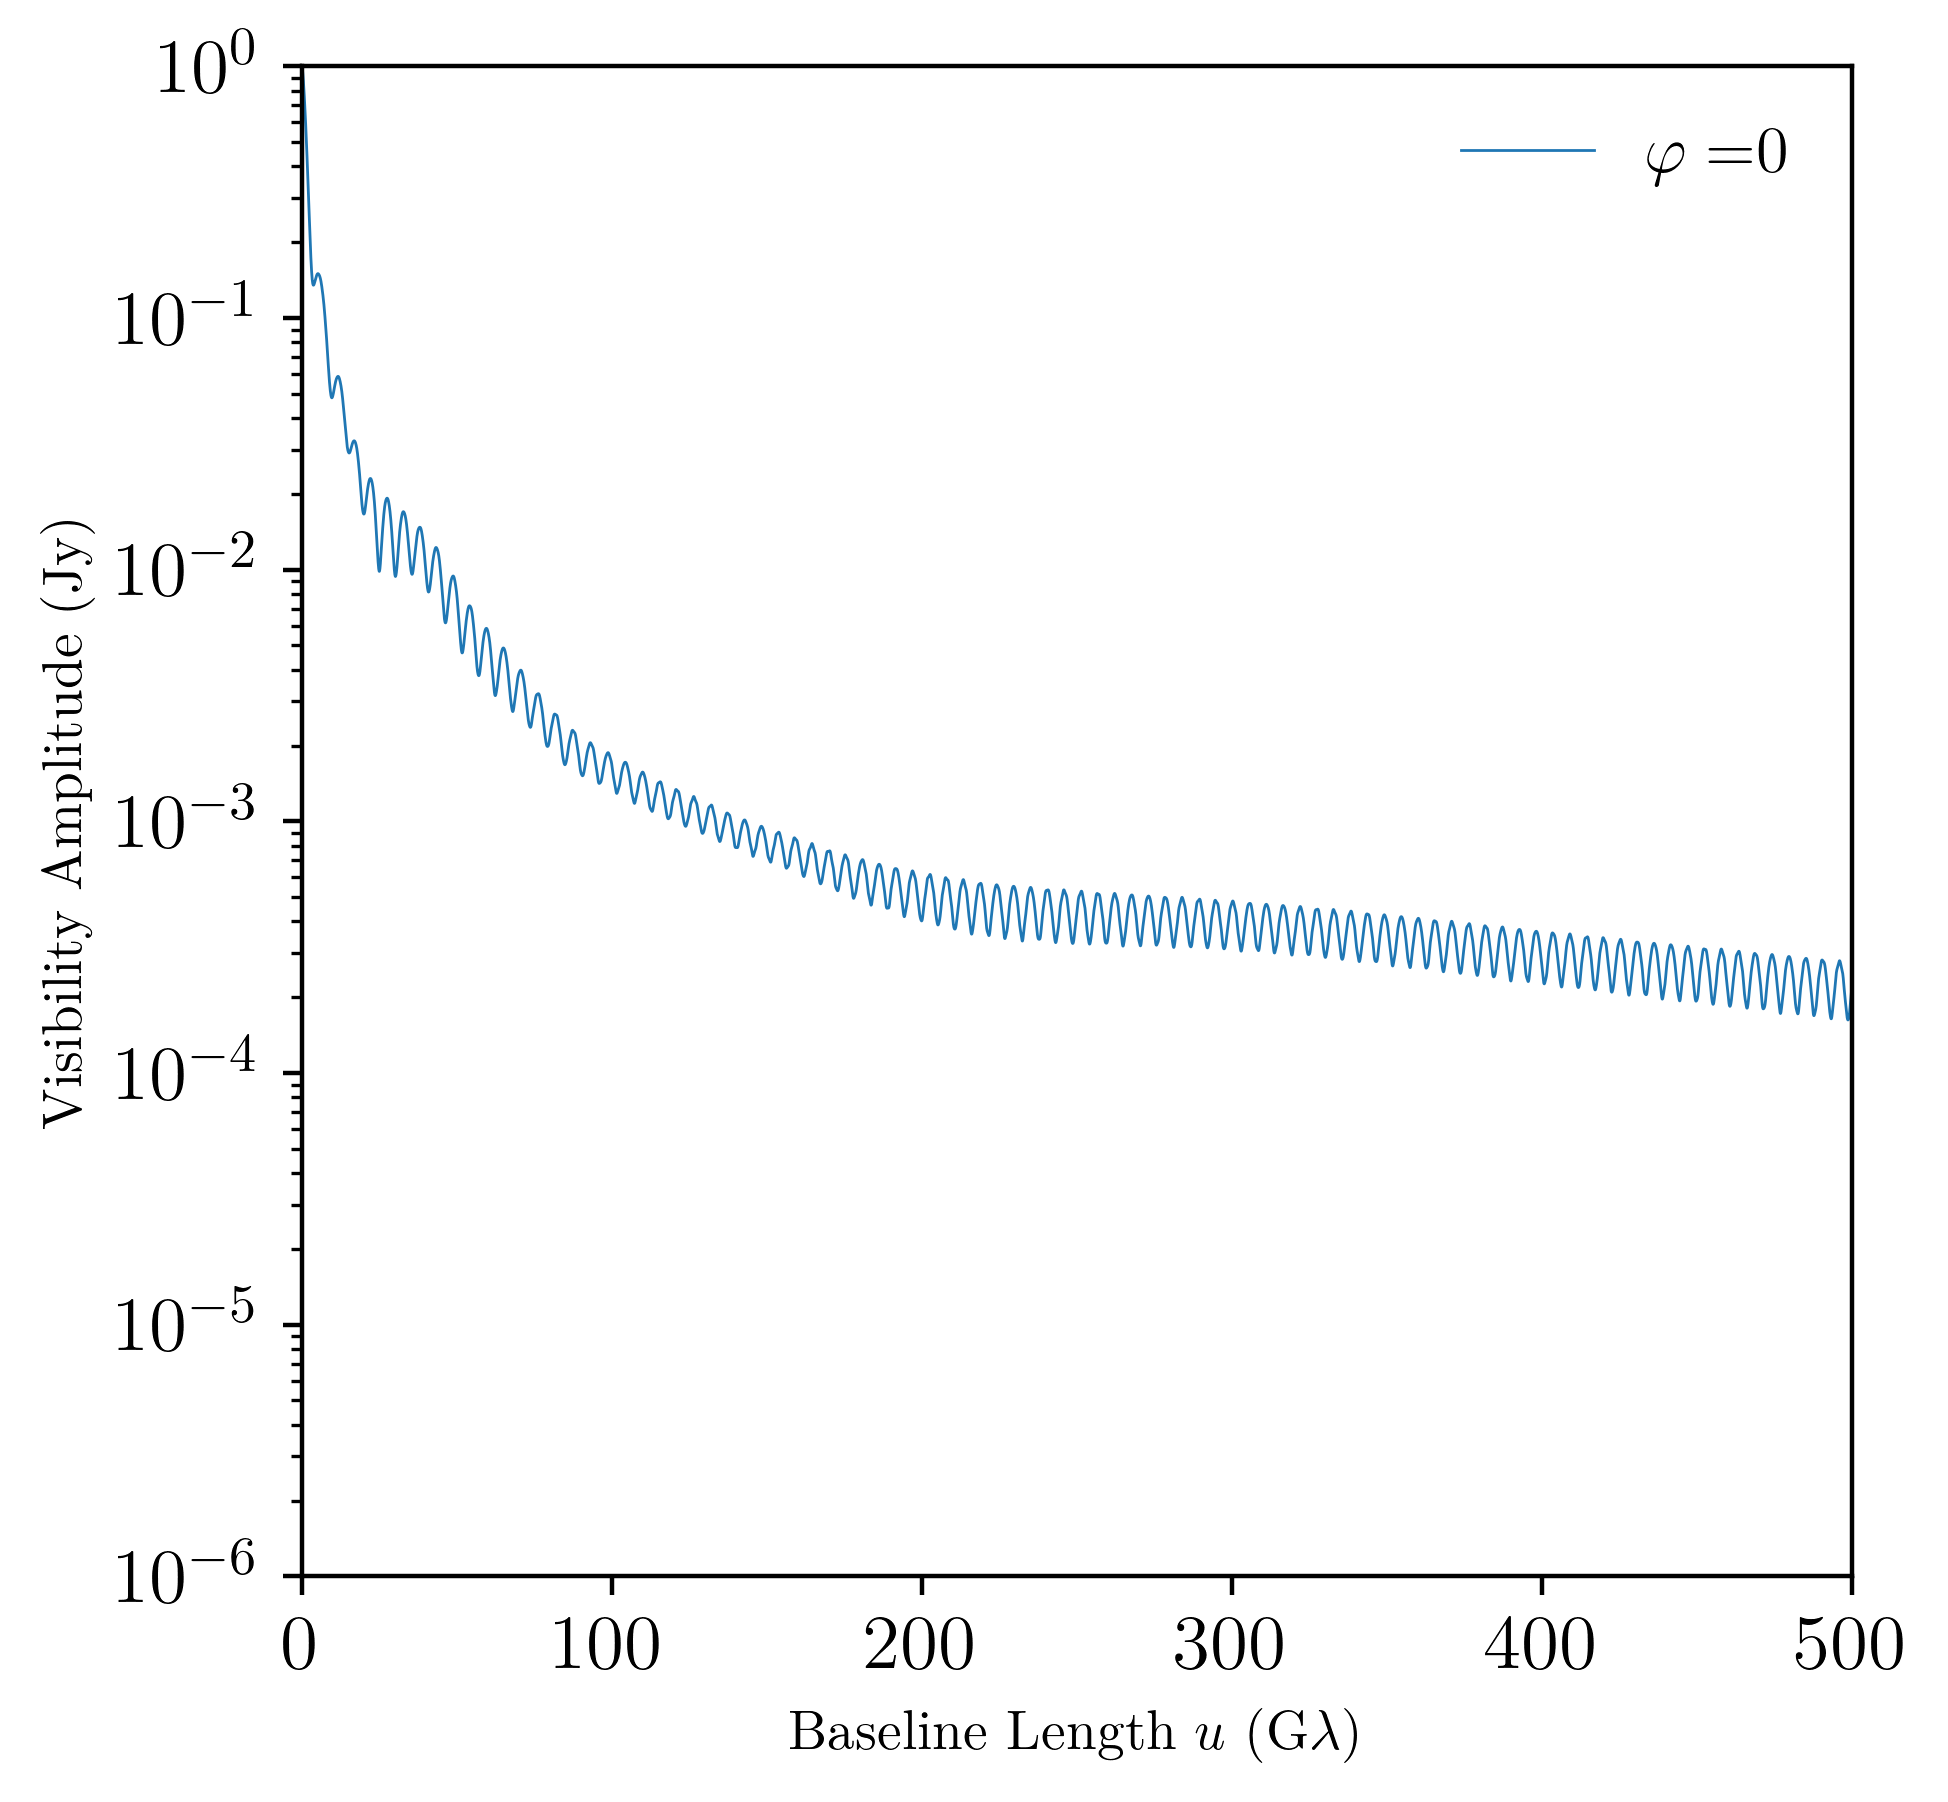

In [8]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)
phi_0 = 0
index = int(phi_0/5)

ax.plot(freqss[index],visamps[index],linewidth=0.5,label=r"$\varphi=$"+"%s"%radonangles[index])
    
plt.yscale("log")
plt.ylabel("Visibility Amplitude (Jy)",size=10)
plt.xlabel("Baseline Length $u$ (G$\\lambda$)",size=10)
plt.legend(loc="best",frameon=False)
plt.xlim(0.,500.)
plt.ylim(1e-6,1)
plt.savefig('Visamp1.png',dpi=1000,bbox_inches='tight')
plt.show()

# Slicing the data

We first extract baselines $u\in[285,315]$ for the $\varphi=0^\circ$ visibility amplitudes

In [9]:
freq_range = freqss[0][(freqss[0]>=285) & (freqss[0]<=315)]
sliced_visamps = visamps[0][(freqss[0]>=285) & (freqss[0]<=315)]

We now plot the visibility amplitude across this narrow baseline window, expecting an approximately sinusoidally varying signal 

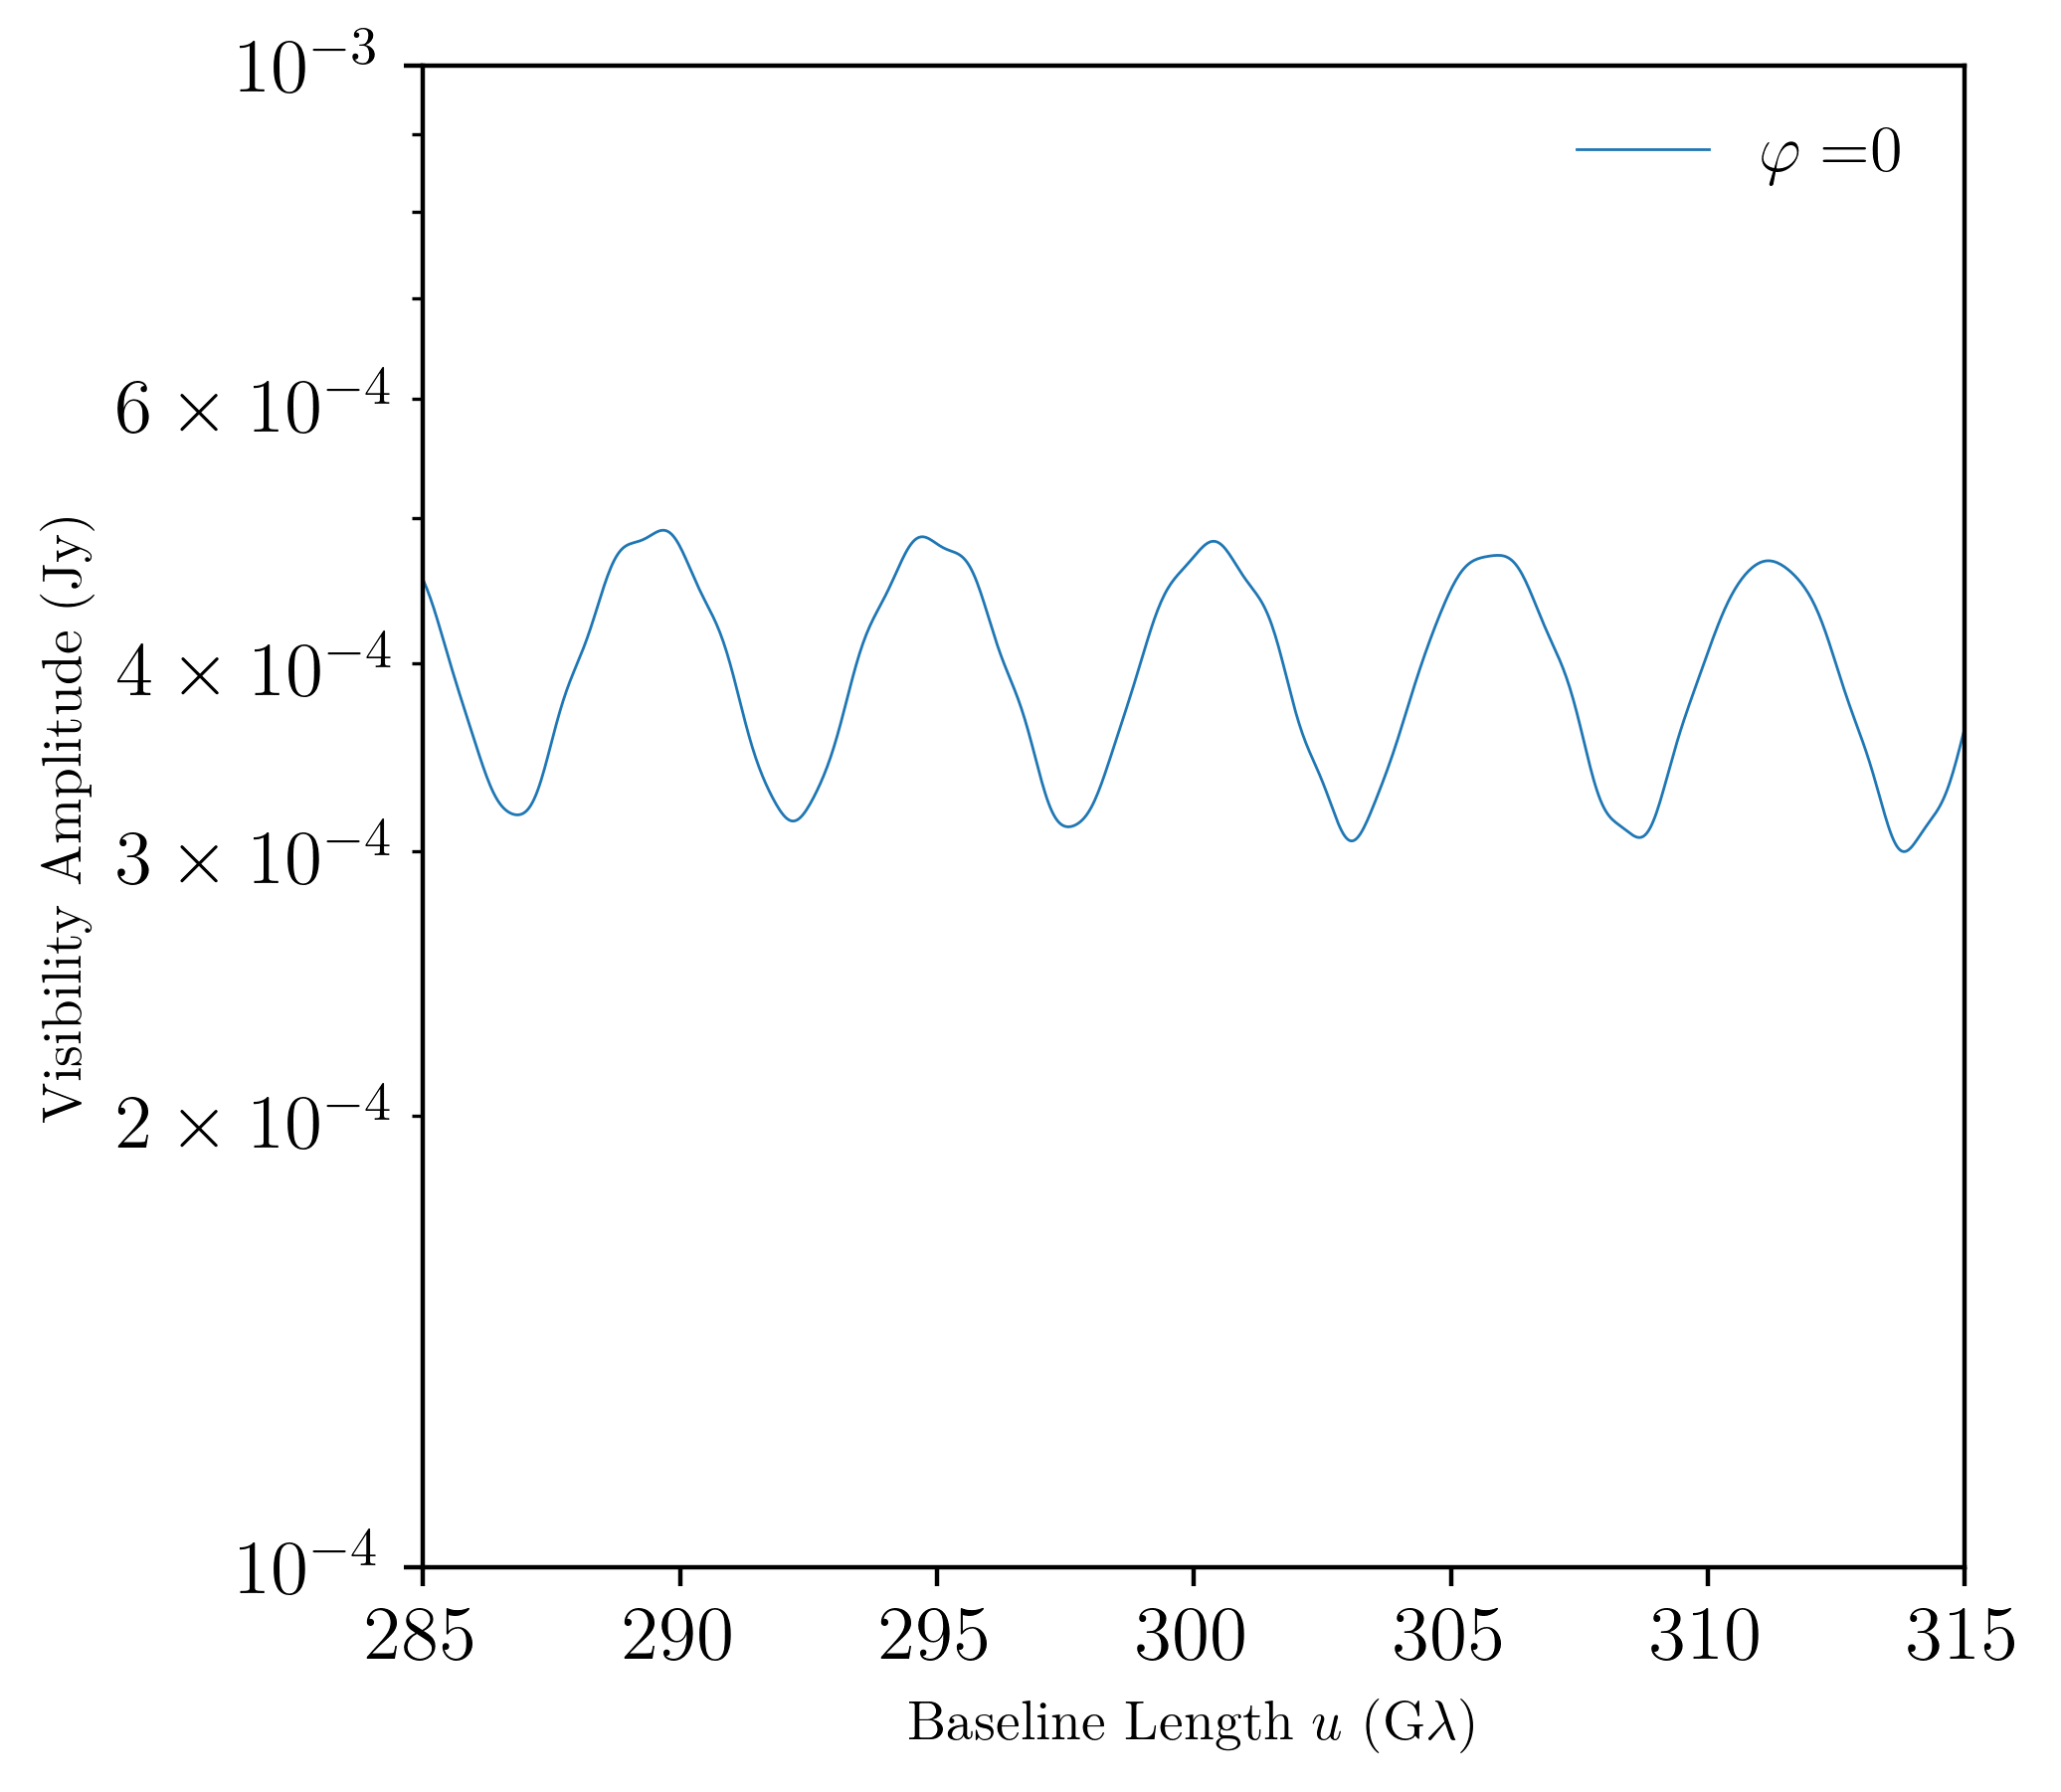

In [10]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.plot(freq_range,sliced_visamps,linewidth=0.5,label=r"$\varphi=$"+"%s"%radonangles[0])
    
plt.yscale("log")
plt.ylabel("Visibility Amplitude (Jy)",size=10)
plt.xlabel("Baseline Length $u$ (G$\\lambda$)",size=10)
plt.legend(loc="best",frameon=False)
plt.xlim(285,315.)
plt.ylim(1e-4,1e-3)
plt.savefig('Visamp1.png',dpi=1000,bbox_inches='tight')
plt.show()

## Envelope fitting

We now find the upper and lower envelopes using cubic spline fitting

In [11]:
from scipy.interpolate import CubicSpline

In [12]:
## given two arrays x and y, this function finds the extreme values of y and their associated x values 
def find_extrema(x, y):
    maxima_x=[]
    maxima_y=[]
    minima_x=[]
    minima_y=[]
    for k in range(1, len(y)-1):
        if (y[k+1]-y[k]<0) and (y[k]-y[k-1]>0):
            maxima_x.append(x[k])
            maxima_y.append(y[k])
        elif (y[k+1]-y[k]>0) and (y[k]-y[k-1]<0):
            minima_x.append(x[k])
            minima_y.append(y[k])
    return maxima_x, maxima_y, minima_x, minima_y

## defining the general cubic function for fitting
def cubic(x, a, b, c, d):
    return a + b*x + c*(x**2) + d*(x**3)
    
va=sliced_visamps
f=freq_range

## locate the extrema in the visibilty amplitudes 
u_x, u_y, l_x, l_y = find_extrema(f, va)

## finding and printing the best fit parameters for the upper and lower envelopes
popt_u, pcov_u = curve_fit(cubic, u_x, u_y)
print("The best fit parameters [a, b, c, d] for the upper envelope are")
print(popt_u)
print("***")

popt_l, pcov_l = curve_fit(cubic, l_x, l_y)
print("The best fit parameters [a, b, c, d] for the lower envelope are")
print(popt_l)

The best fit parameters [a, b, c, d] for the upper envelope are
[-5.76721650e-02  5.79576816e-04 -1.92115228e-06  2.11792292e-09]
***
The best fit parameters [a, b, c, d] for the lower envelope are
[ 1.04525544e-02 -1.00199722e-04  3.31757049e-07 -3.68209223e-10]


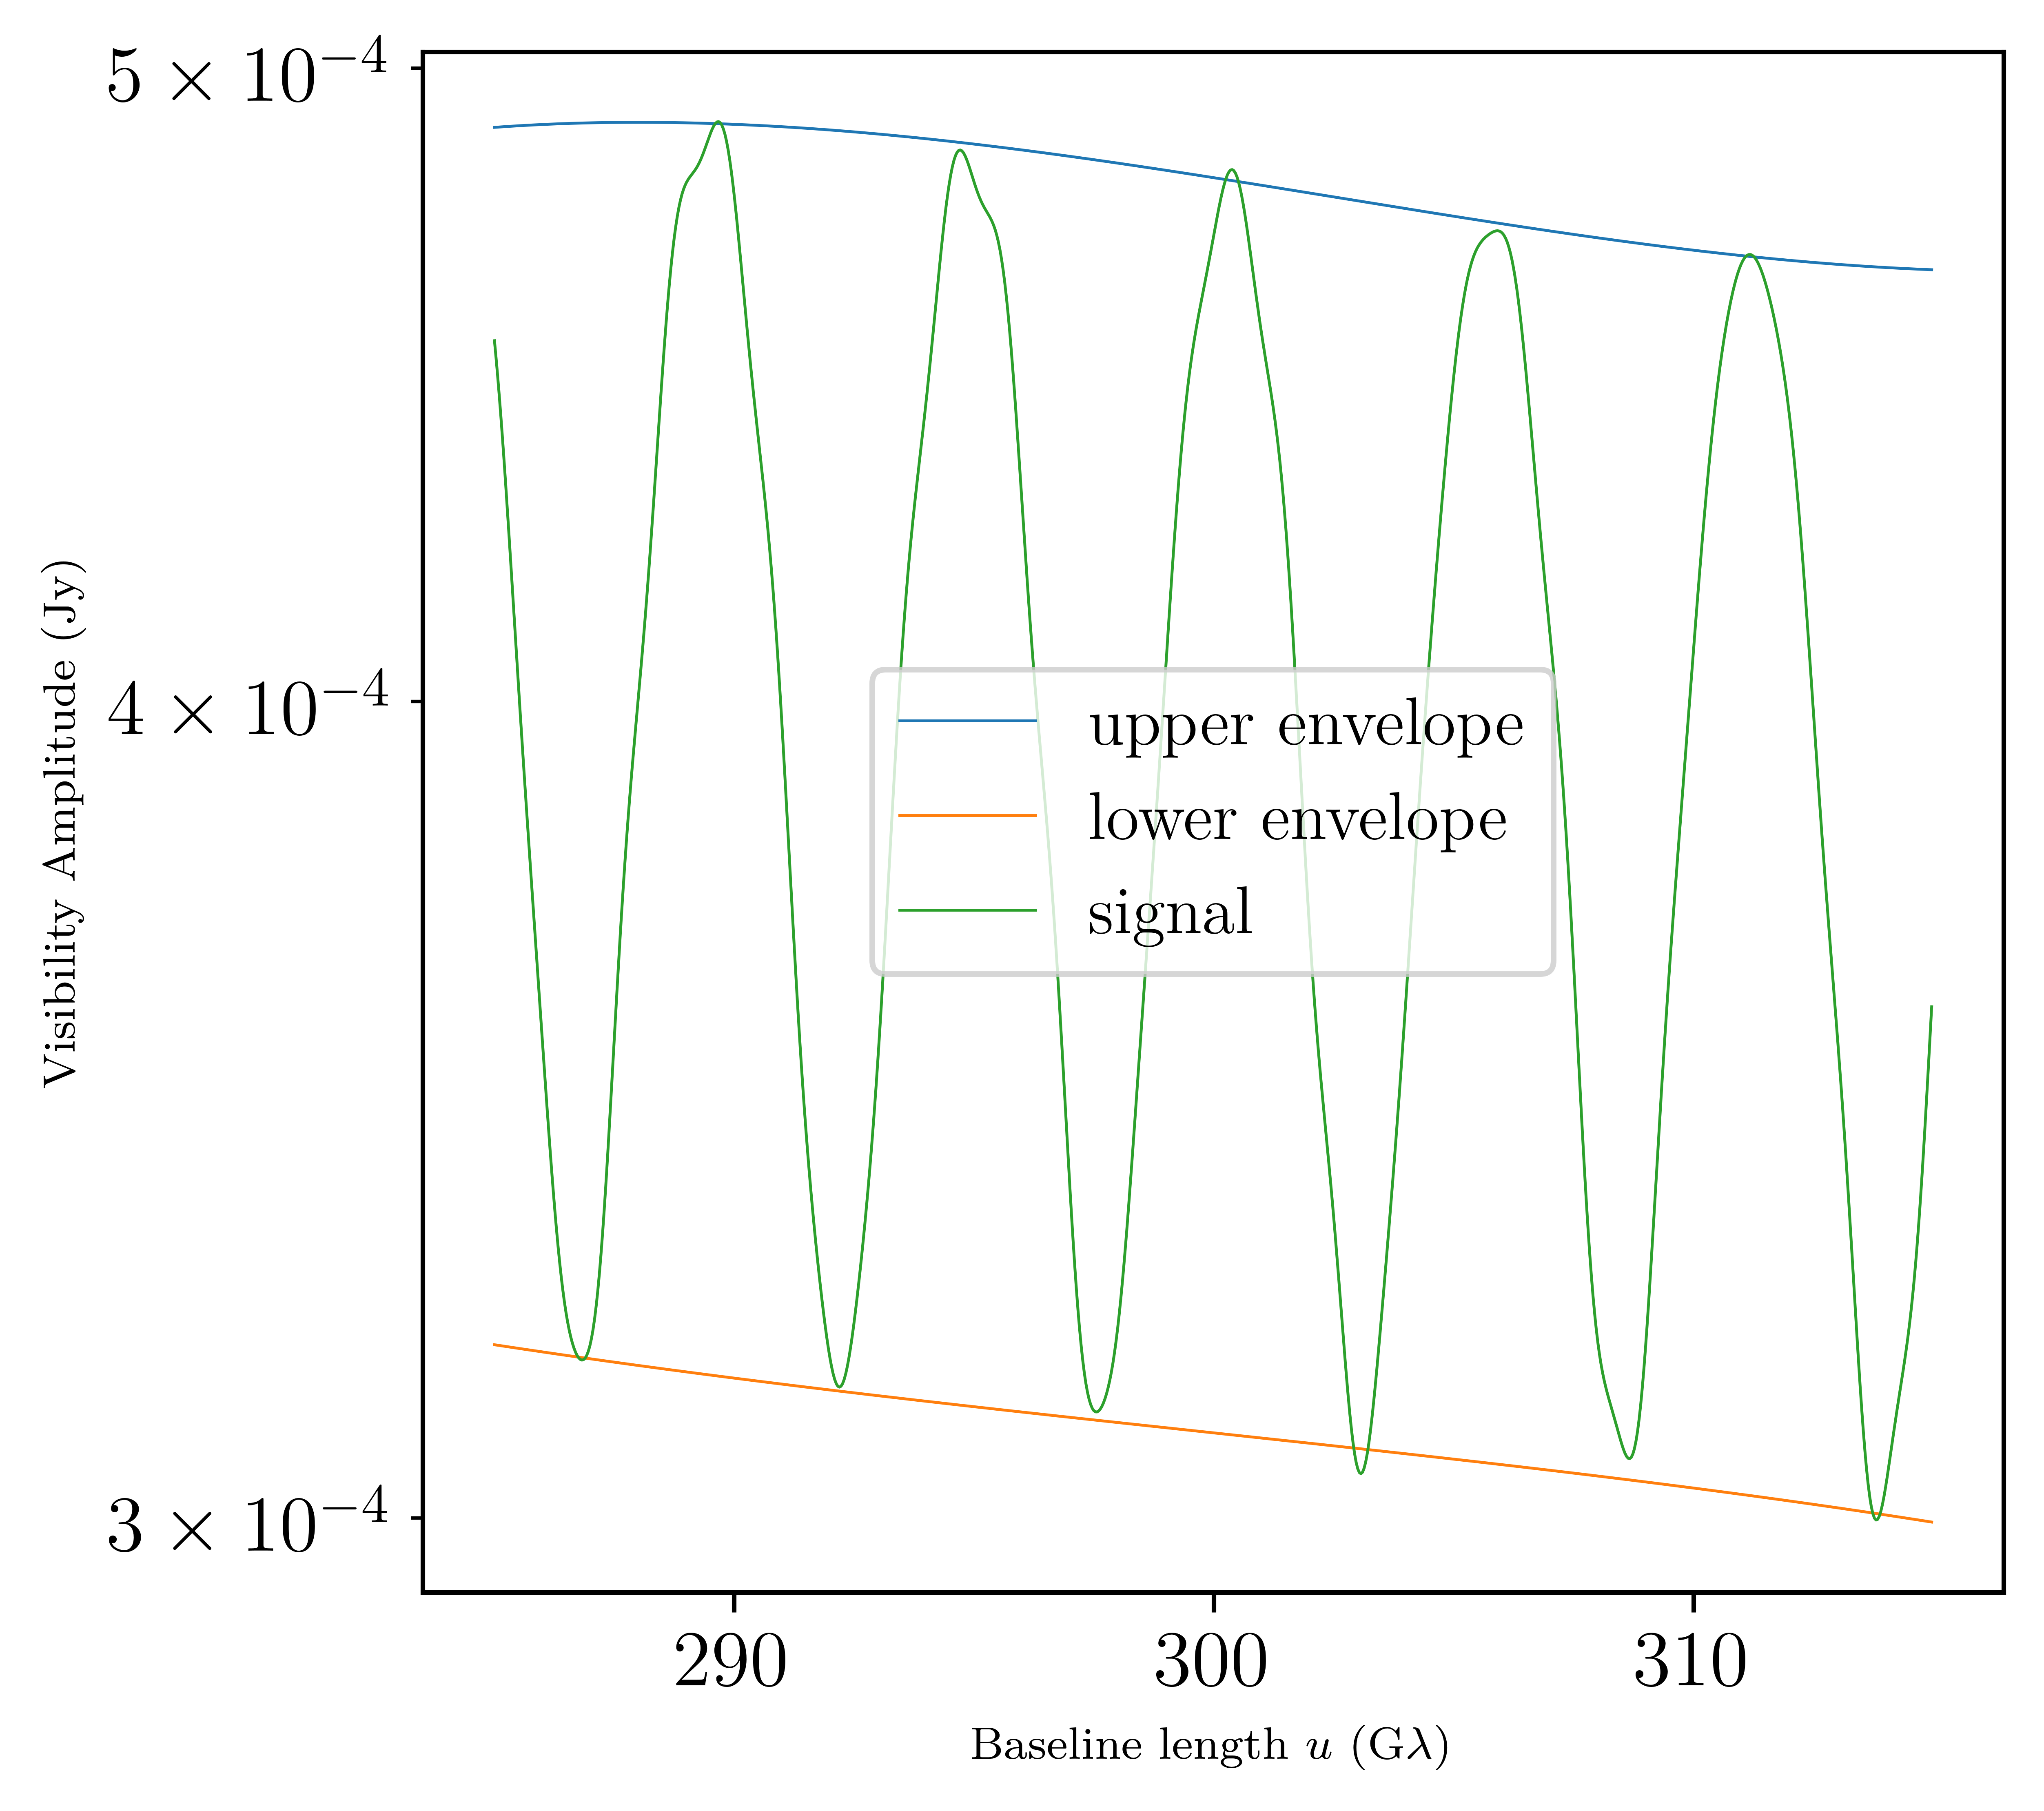

In [13]:
## plotting the signal and the envelopes
fig, ax = plt.subplots(figsize=[5,5],dpi=1000)

ax.plot(f, cubic(f, *popt_u),linewidth=0.5, label='upper envelope')
ax.plot(f, cubic(f, *popt_l),linewidth=0.5, label='lower envelope')

plt.yscale("log")
ax.plot(f, va,linewidth=0.5, label='signal')
plt.xlabel("Baseline length $u$ (G$\\lambda$)", size=8)
plt.ylabel("Visibility Amplitude (Jy)",size=8)
plt.legend(loc="best",frameon=False)
plt.legend()
plt.show()

## Finding the ring diameter $d_{\varphi}$

In [14]:
## conversion parameters to make the argument of the sin function dimensionless when fitting 
muas_to_rad = np.pi/648000 *1e-6 #1 microarcsec in radians
unitfact=1/(muas_to_rad*1e9)

We estimate the ring diameter $d_\varphi$ as the best fit parameter $d$ of the visibility signal to the functional form

\begin{align}
    V_{\text{fit}}(u;d)&=\sqrt{\alpha_{L}^{2}(u)+\alpha_{R}^{2}(u)+2\alpha_{L}(u)\alpha_{R}(u)\sin{(2\pi d u)}},
\end{align}

where $\alpha_{L/R}(u)$ are given by

\begin{align}
    \alpha_{L/R}&=\frac{e_{\text{max}}(u)\pm e_{\text{min}}(u)}{2}
\end{align}

In [15]:
## defining envelope functions and the visibility fitting curve
## u_params are the best fit parameters [a, b, c, d] for the upper cubic envelope, and similarly for l_params
def e_max(u, u_params):
    return cubic(u, *u_params)
def e_min(u, l_params):
    return cubic(u, *l_params)

def alpha_l(u, u_params, l_params):
    return (e_max(u, u_params)+e_min(u, l_params))/2.0
def alpha_r(u, u_params, l_params):
    return (e_max(u, u_params)-e_min(u, l_params))/2.0

def v_fit(x, d):
    return np.sqrt(alpha_l(x, popt_u, popt_l)**2+alpha_r(x, popt_u, popt_l)**2+2*alpha_l(x, popt_u, popt_l)*
                   alpha_r(x, popt_u, popt_l)*np.sin(2*np.pi*d*x/unitfact))

In [16]:
## carrying out the fitting
popt_v, pcov_v = curve_fit(v_fit, f, va, p0=38.5, maxfev=2000)
print("ring diameter d = " + str(popt_v[0]))

ring diameter d = 38.63120364678597


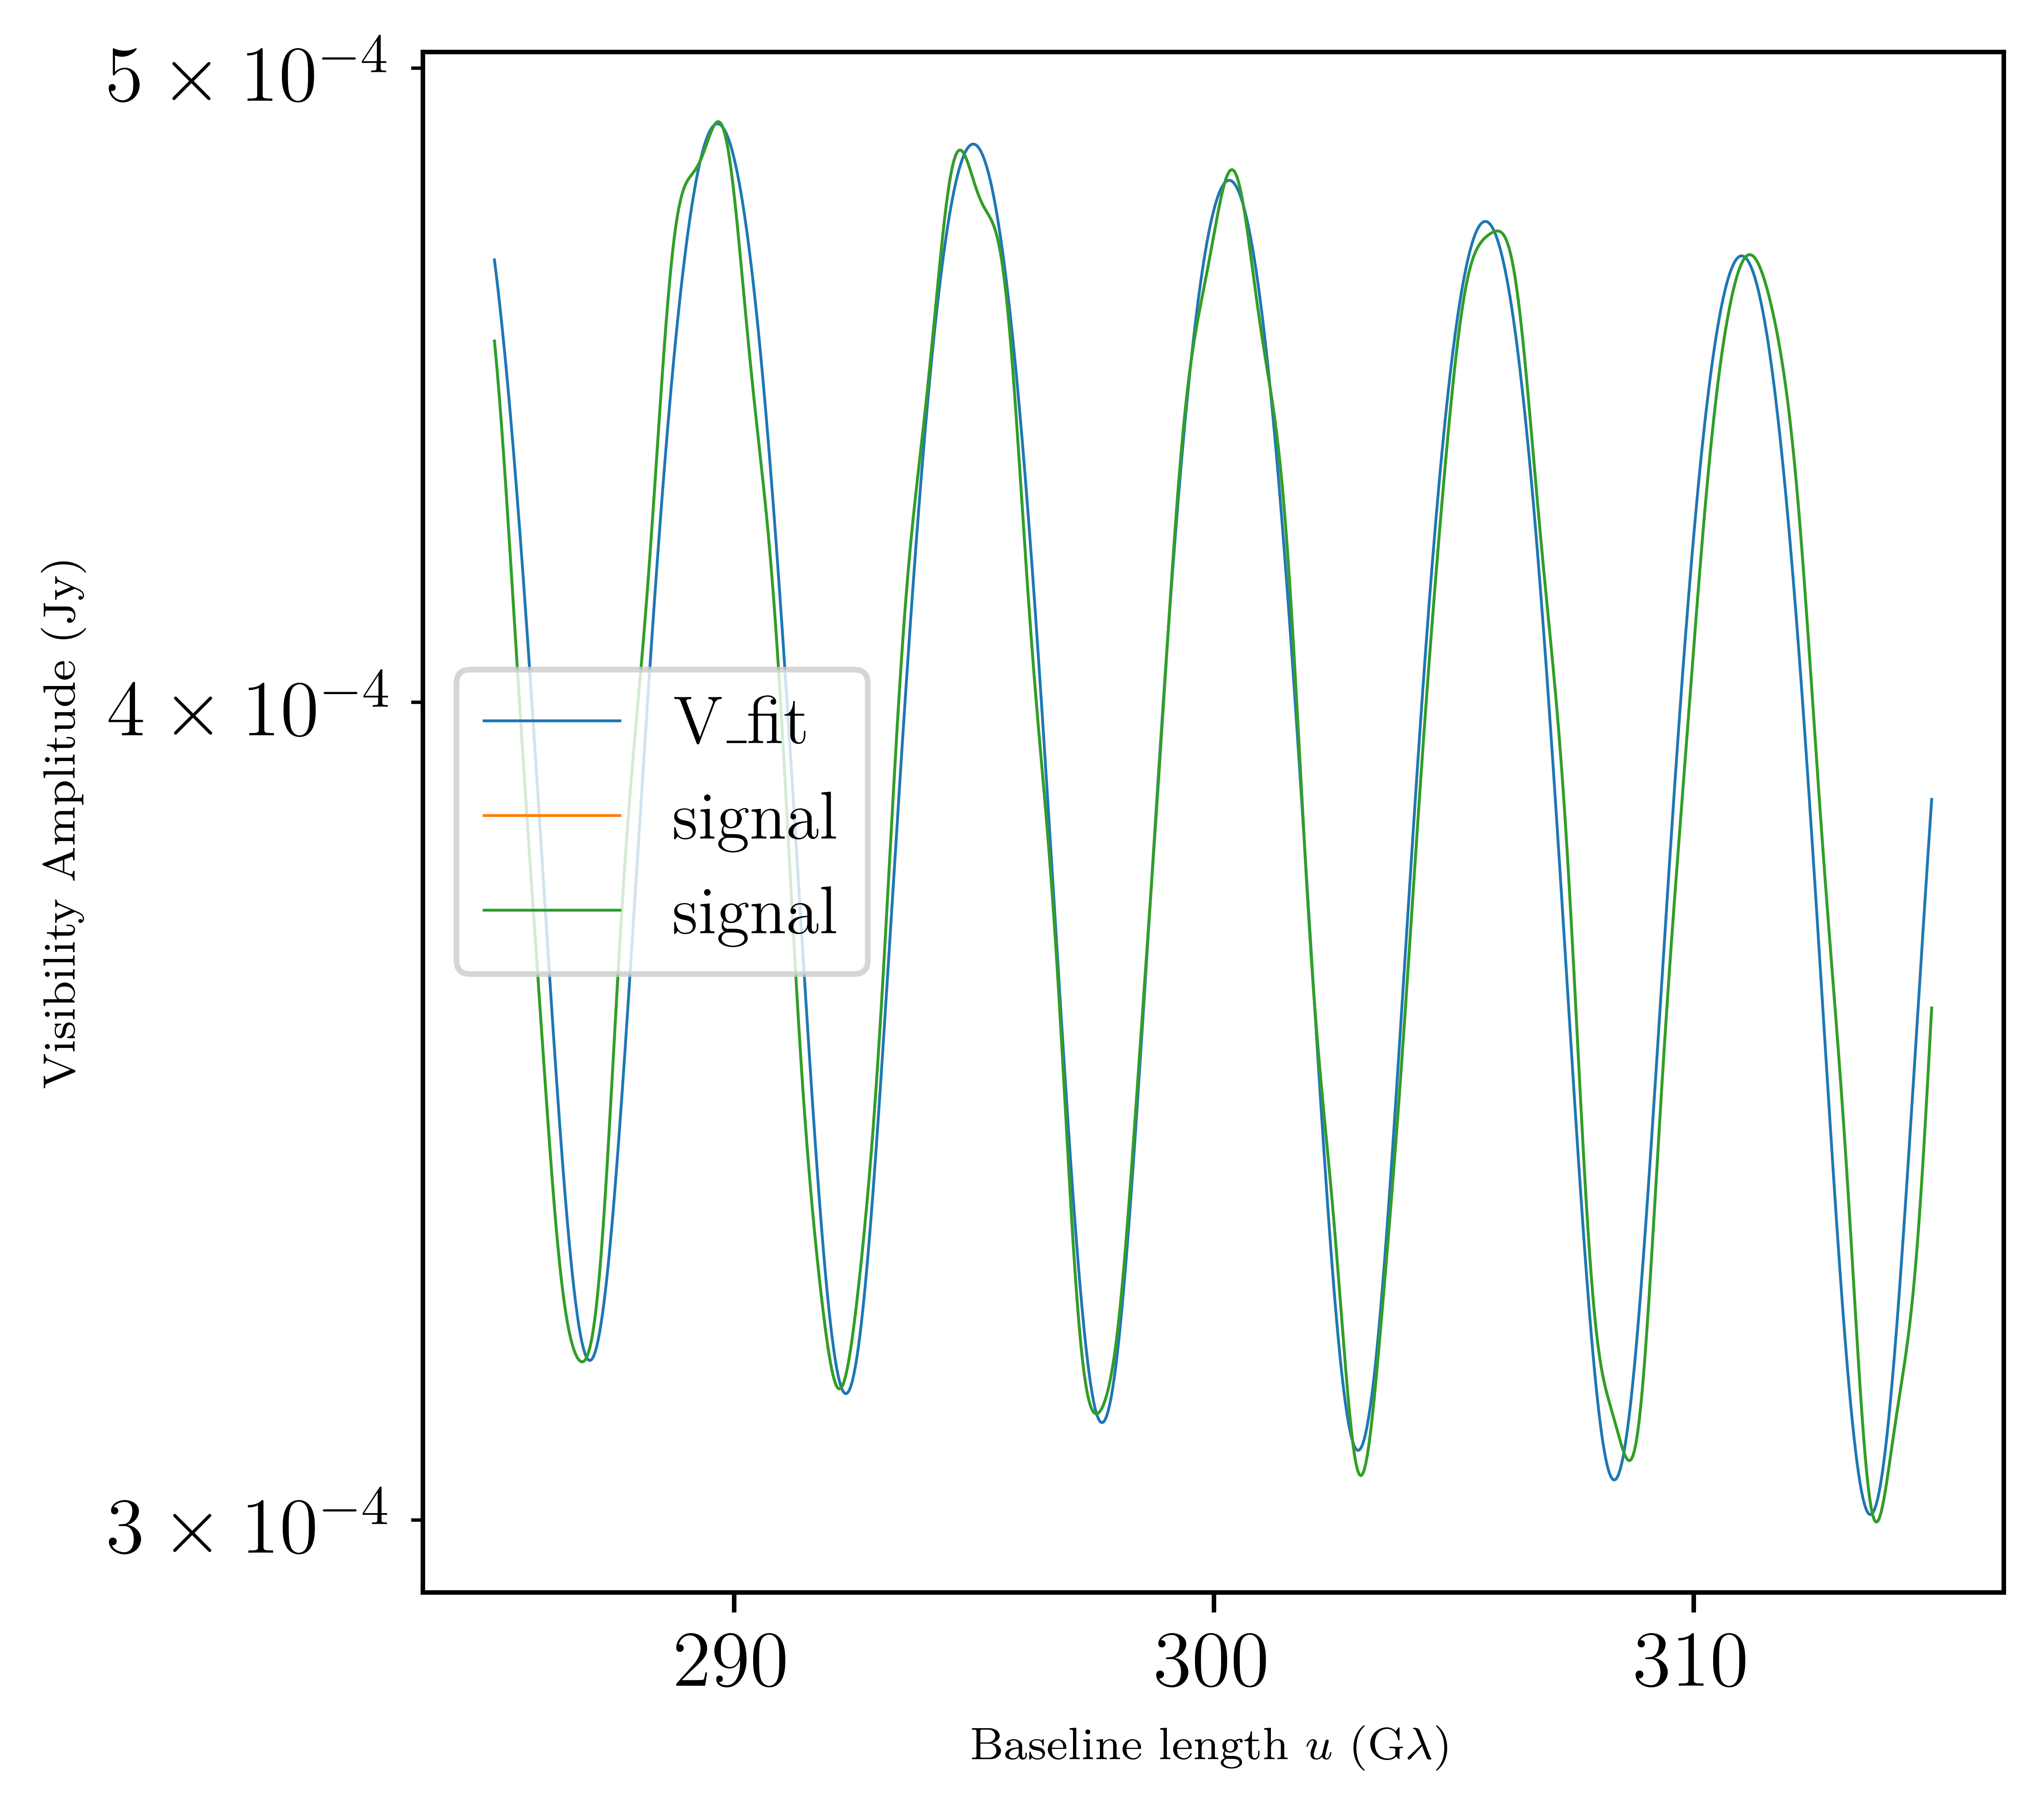

In [17]:
## plotting the fitted form and the actual signal
fig, ax = plt.subplots(figsize=[5,5],dpi=1000)

ax.plot(f, [v_fit(x, *popt_v) for x in f], linewidth=0.5, label="V_fit")
ax.plot(f, va,linewidth=0.5, label='signal')

plt.yscale("log")
ax.plot(f, va,linewidth=0.5, label='signal')
plt.xlabel("Baseline length $u$ (G$\\lambda$)", size=8)
plt.ylabel("Visibility Amplitude (Jy)",size=8)
plt.legend(loc="best",frameon=False)
plt.legend()
plt.show()

## Accounting for the ring diameter's multi-peaked distribution

In [18]:
## define the RMSD
def RMSD(d, x, y):
    deviation = 0
    avg_v_fit = 0
    for i in range(0, len(x)):
        deviation= deviation + (v_fit(x[i], d)-abs(y[i]))**2
        avg_v_fit = avg_v_fit + v_fit(x[i], d)
    return np.sqrt(deviation/len(x))/(avg_v_fit/len(x))

## define the goodness of fit measure
def g_fit(d, x, y):
    return math.exp(-RMSD(d, x, y))

## generates a range of d values around d_0 with width 10/u_w
def d_range(u_w, d):
    delta_d = 10*unitfact/u_w
    return np.arange(d-delta_d/2.0, d+delta_d/2.0, delta_d/1000.0)

In [19]:
## best fit diameter from curve fitting
d_0 = popt_v[0]

## range of diameter values around the local maxima d_0 and their respective goodness of fits
drange = d_range(f[-1], d_0)
g_vals = [g_fit(d, f, va) for d in drange]

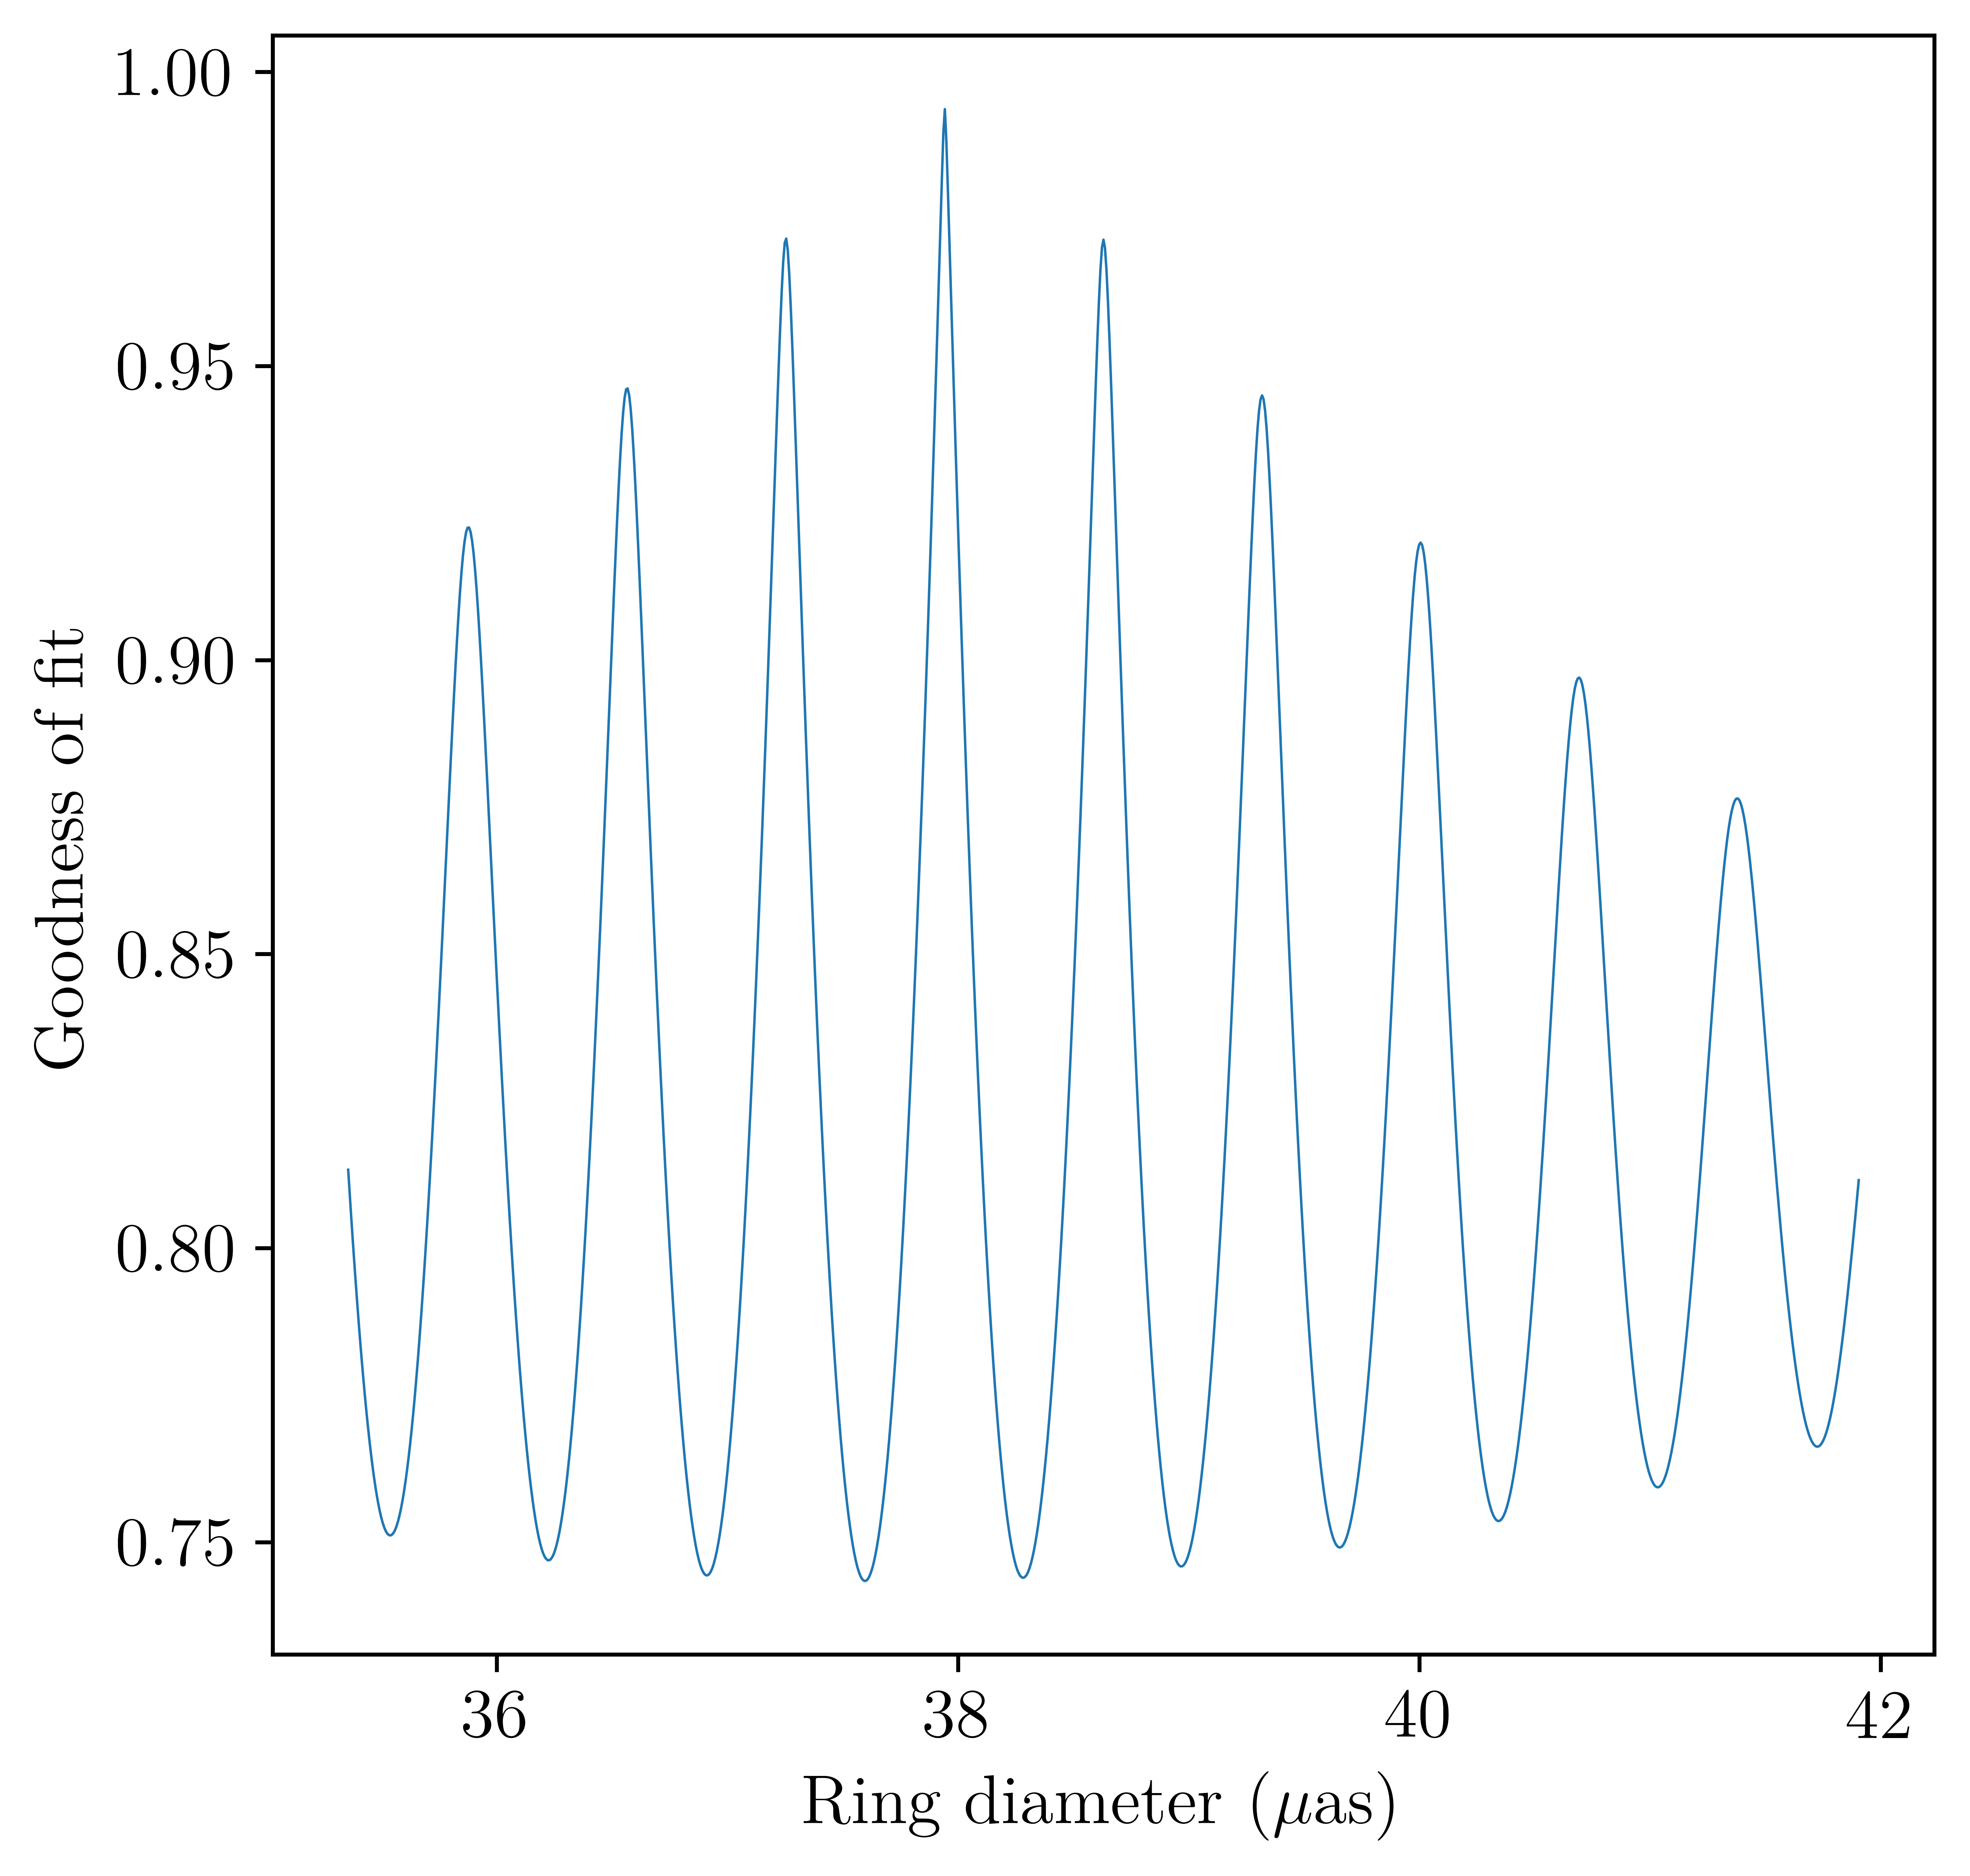

In [20]:
## plotting the diameter values against their goodness of fit
fig, ax = plt.subplots(figsize=[6,6],dpi=1000)

ax.plot(drange, g_vals, linewidth=0.5)

plt.xlabel("Ring diameter $(\mu$as)", size=14)
plt.ylabel("Goodness of fit",size=14)
plt.show()

We now filter our list of ring diameters, keeping only those with a goodness of fit higher than some desired threshold

In [21]:
## returns points (x, y) corresponding to maxima from the coupled arrays x, y with a y value greater than min
def filter_maxima(x, y, min):
    x_new = []
    y_new = []
    for k in range(1, len(x)-1):
            if (y[k+1]-y[k]<0) and (y[k]-y[k-1]>0):
                if y[k]>min:
                    x_new.append(x[k])
                    y_new.append(y[k])
    return x_new, y_new

## keep values of d with g(d) above g_min
g_min = 0.92
d_maxima, g_maxima = filter_maxima(drange, g_vals, g_min)

We now repeat the above analysis for 36 values of $\varphi\in[0, 180)$

In [22]:
d_0_vals=[]
d_vals=[]
g_vals=[]
for i in range(0,36):
    freq_range = freqss[i][(freqss[i]>=285) & (freqss[i]<=315)]
    sliced_visamps = visamps[i][(freqss[i]>=285) & (freqss[i]<=315)]
    
    va=sliced_visamps
    f=freq_range
    
    ## locate the extrema in the visibilty amplitudes 
    u_x, u_y, l_x, l_y = find_extrema(f, va)

    ## finding the best fit parameters for the cubic envelopes 
    
    popt_u, pcov_u = curve_fit(cubic, u_x, u_y)

    popt_l, pcov_l = curve_fit(cubic, l_x, l_y)
    
    ## defining the visibility curve
    def v_fit(x, d):
        return np.sqrt(alpha_l(x, popt_u, popt_l)**2+alpha_r(x, popt_u, popt_l)**2+2*alpha_l(x, popt_u, popt_l)*
                       alpha_r(x, popt_u, popt_l)*np.sin(2*np.pi*d*x/unitfact))
    
    ## finding the best fit diameter that minimizes the RMSD
    popt_v, pcov_v = curve_fit(v_fit, f, va, p0=38.5, maxfev=2000)
    d_0 = popt_v[0]
    d_0_vals.append(d_0)
    
    ## finding the local maxima of d_\phi

    drange = d_range(f[-1], d_0)
    gvals = [g_fit(d, f, va) for d in drange]
    
    ## keep values of d with g(d) above g_min
    g_min = 0.70
    d_maxima, g_maxima = filter_maxima(drange, gvals, g_min)
    
    ## store filtered diameters 
    d_vals.append(d_maxima)
    g_vals.append(g_maxima)

In [23]:
## defining constants for unit conversions

dM=5.214795112e23  # Distance to M87 in meters
psi=1.07473555940836 # Mass of M87 1 /psi= 6.2e9 Kg
Gc=6.67e-11 # G constant [m^3 kg^-1 s^-2]
cc= 2.99792458e8 # c constant [m/s]
Msc=1.988435e30 # Solar Mass [Kg]
MMkg= 6.2e9*psi*Msc # [Kg]
MM87=MMkg *Gc/cc**2 # Mass of M87 in meters, i.e., (psi*6.2*10^9) psi ("Best fit") Solar Masses 
sizeim=MM87 # Size of M in meters
muas_to_rad = np.pi/648000 *1e-6 #1 microarcsec in radians
unitfact=1/(muas_to_rad*1e9)
M_to_muas=np.arctan(sizeim/(dM))/muas_to_rad

We now plot the various diameters that are local maxima of the goodness of fit against the baseline angle $\varphi$, the analogue of (figure 5: left-- cite)

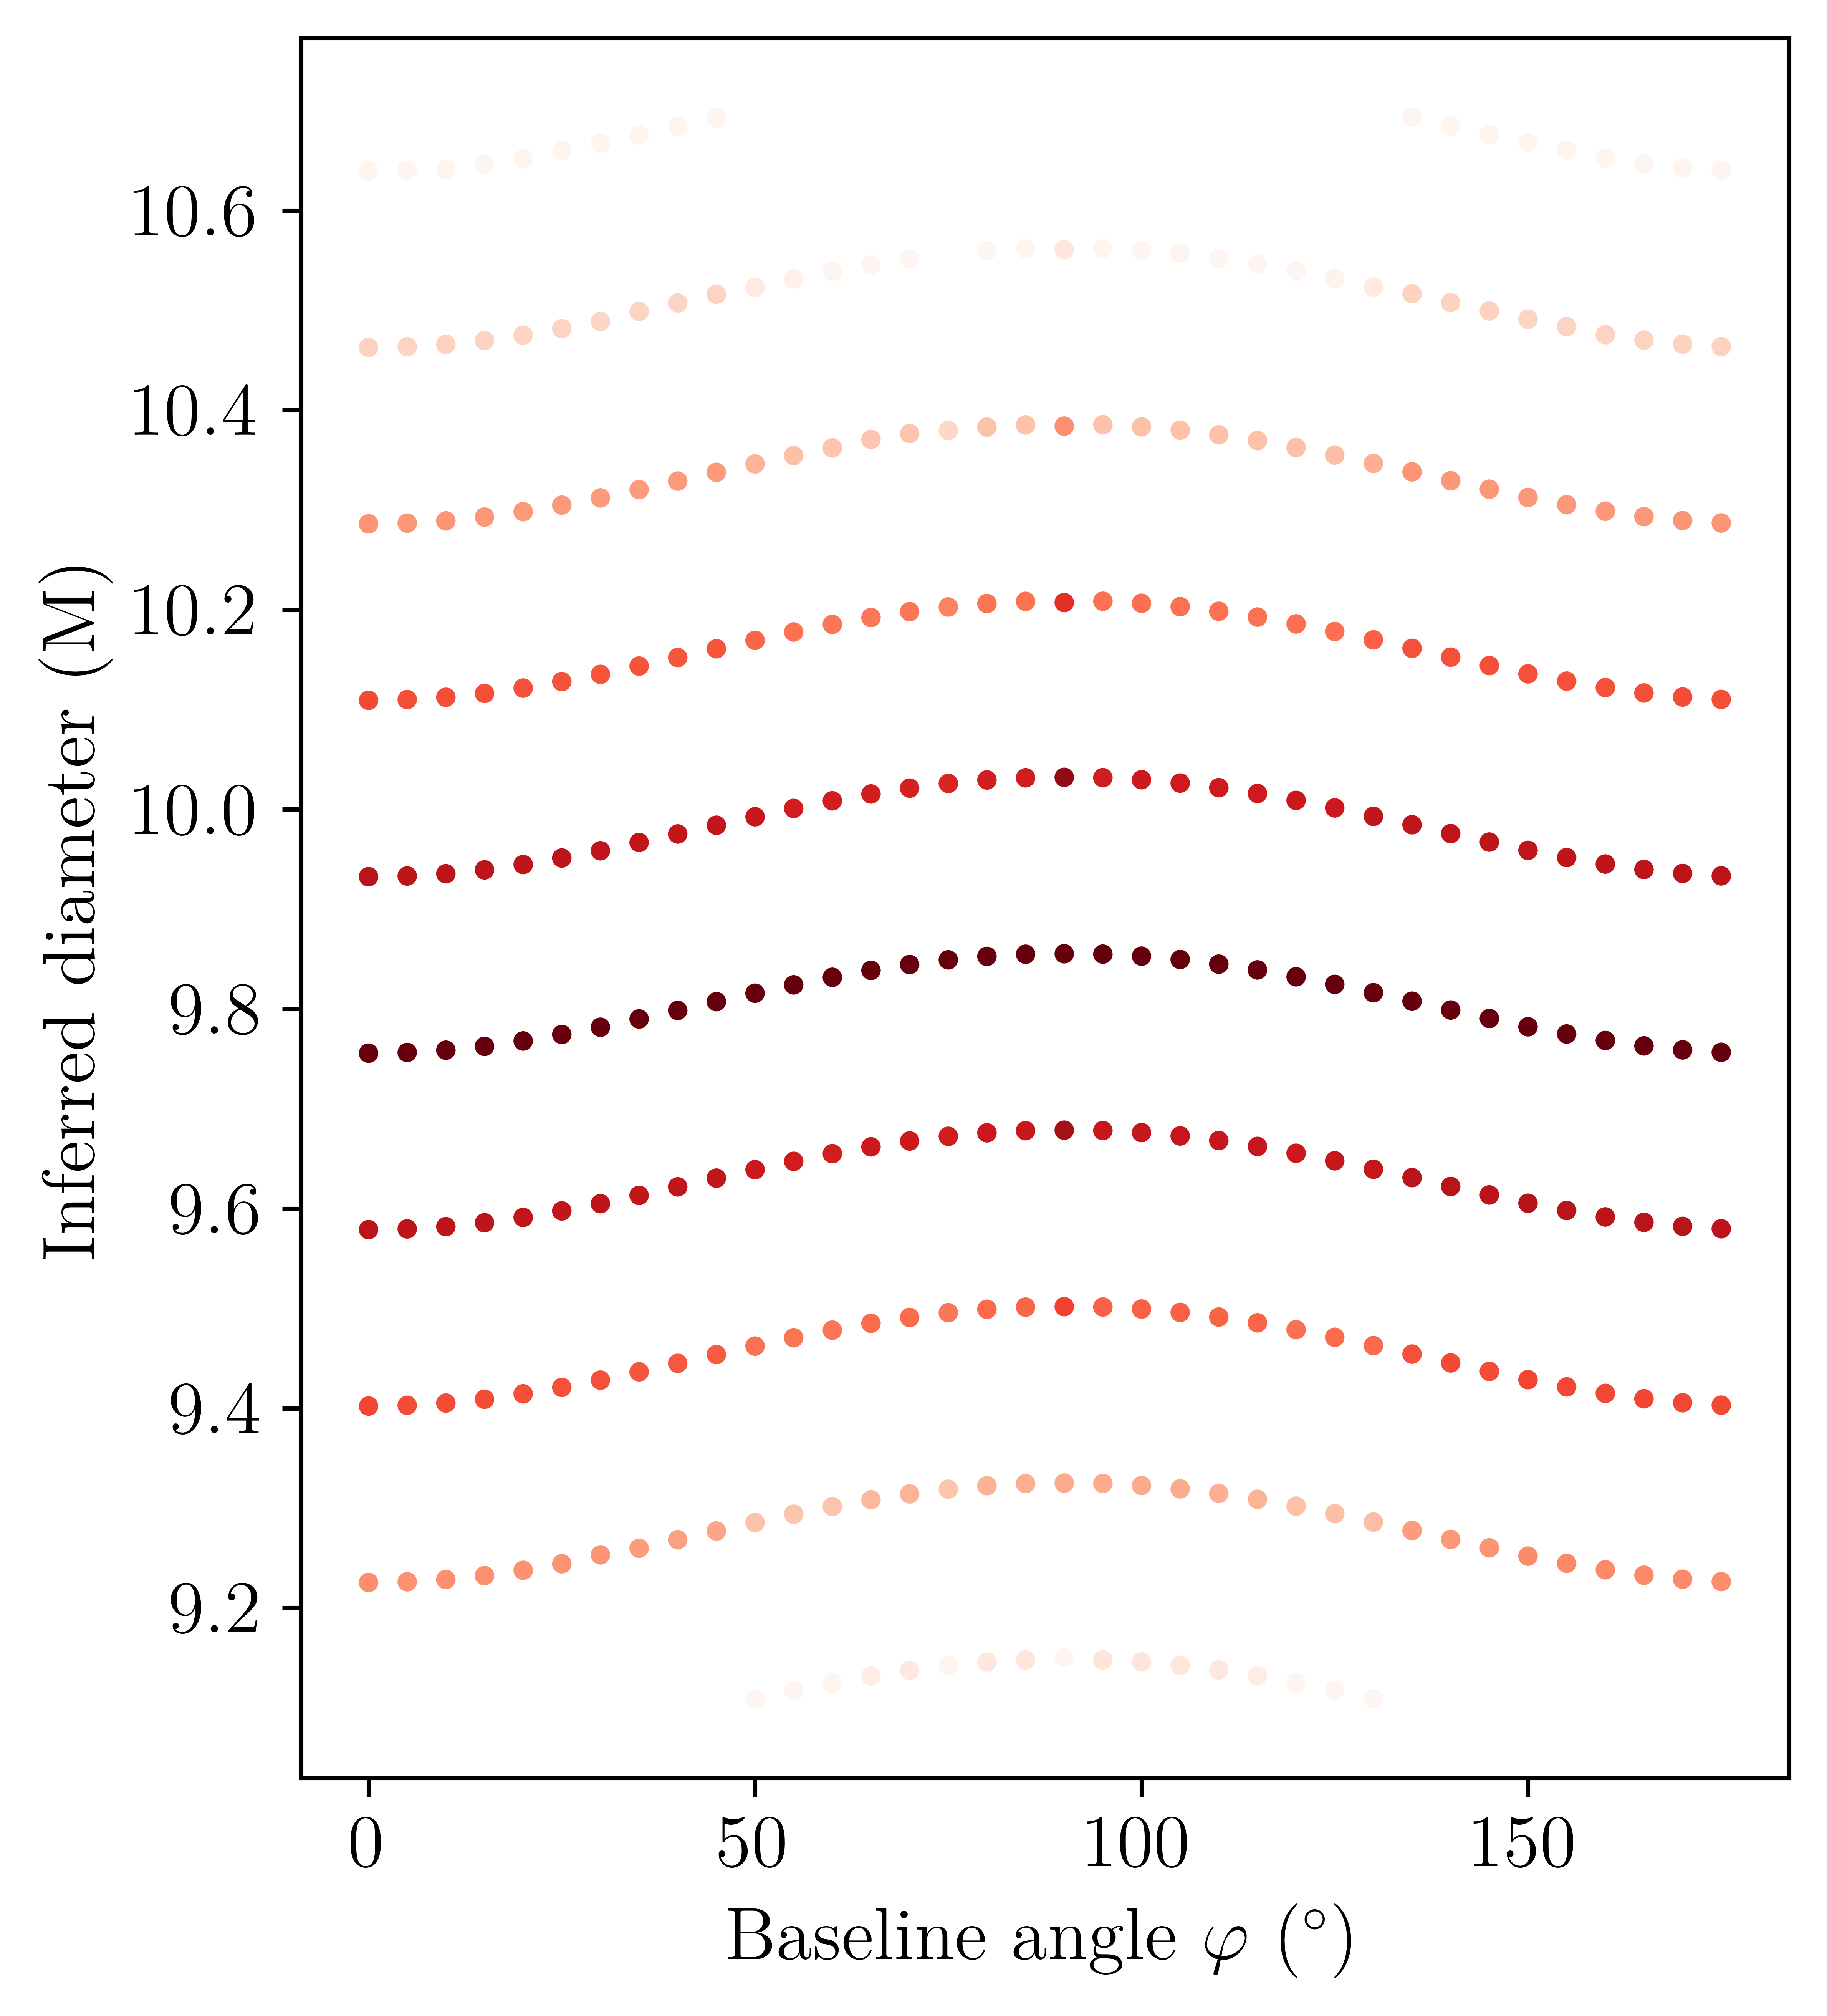

In [24]:
fig, ax = plt.subplots(figsize=[5,6],dpi=1000)

# ax.plot(drange, g_vals, linewidth=0.5)
for i in range(0, len(d_vals)):
    darray = d_vals[i]
    ax.scatter([radonangles[i] for j in range(0, len(darray))], np.array(darray)/M_to_muas, c=g_vals[i], cmap='Reds', s=7)
    
plt.xlabel("Baseline angle $\\varphi$ $(^\circ)$", size=14)
plt.ylabel("Inferred diameter (M)",size=14)
plt.savefig('diameter_baseline_spin_94_ex.pdf',dpi=1000,bbox_inches='tight')
plt.show()

# Accounting for the ring diameter degeneracy

## Finding the most probable circlipse

For each baseline angle we only kept local maxima of the RMSD that had a goodness of fit above some specified value "g_min". This means that the number of kept inferred diameters need not be the same for each baseline angle. Denote by $n_\varphi$ the number of inferred diameters kept for baseline angle $\varphi$. Then, the number of circlipses $n_c$ we want to form is given by 

\begin{align}
    n_c&=\max_{\varphi}(n_\varphi).
\end{align}

The baseline angle $\varphi=0^{\circ}$ may not have $n_c$ local maxima of the RMSD above g_min, so we need to begin the implementation of our nearest neighbour algorithm at a baseline angle with $n_c$ local maxima.

In [25]:
## given an array of arrays x, with associated values given by the array of arrays y, this function generates
## nearest neighbour curves whose first point is an element of the array at index i0 in x.
## The nearest neighbour of some point in array x[i] is the point closest in value in array x[i+1], where the 
## argument of the array x is modulo len(x), since we don't necessarily start at the first array in x 
## but we must traverse all the arrays in x

def generate_curves(x, y, i0):
    x_curves = []   ## x-values for the curves
    y_curves = []   ## y-values for the curves
    
    Lx = len(x)
    
    for j in range(0, len(x[i0%Lx])): ## create a circlipse beginning at each element in starting array x[i0%Lx]
        x_curve=[x[i0%Lx][j]]
        y_curve=[y[i0%Lx][j]]
        for i in range (i0+1, i0+Lx):  ## start from i0+1 because the first point in the curve is already set
            previous_point_x=x_curve[-1]
            next_point_x=x[i%Lx][0]
            next_point_y=y[i%Lx][0]
#             try: 
#                 next_point_x=x[i%Lx][0]
#                 next_point_y=y[i%Lx][0]
#             except IndexError:
#                 break
            diff = abs(previous_point_x - next_point_x)
            for m in range(1, len(x[i%Lx])):
                compare_x=x[i%Lx][m]
                if(abs(previous_point_x-compare_x)<diff): ## choose the point closest to x_curve[-1] 
                    diff=abs(previous_point_x-compare_x)
                    next_point_x = compare_x
                    next_point_y=y[i%Lx][m]
            x_curve.append(next_point_x)
            y_curve.append(next_point_y)
        x_curves.append(x_curve)
        y_curves.append(y_curve)
    return x_curves, y_curves

In [26]:
phi_0 = np.argmax([len(x) for x in d_vals]) ## index of the first baseline with the maximum number of diameters
circlipses, g_circlipses = generate_curves(d_vals, g_vals, phi_0)
g_circlipses = [np.prod(g) for g in g_circlipses]  ## joint goodness of fit for each circlipse

In [27]:
## now we pick the circlipse with the highest goodness of fit and plot it
best_circlipse = circlipses[np.array(g_circlipses).argmax()]

Text(0, 0.5, 'Inferred diameter (M)')

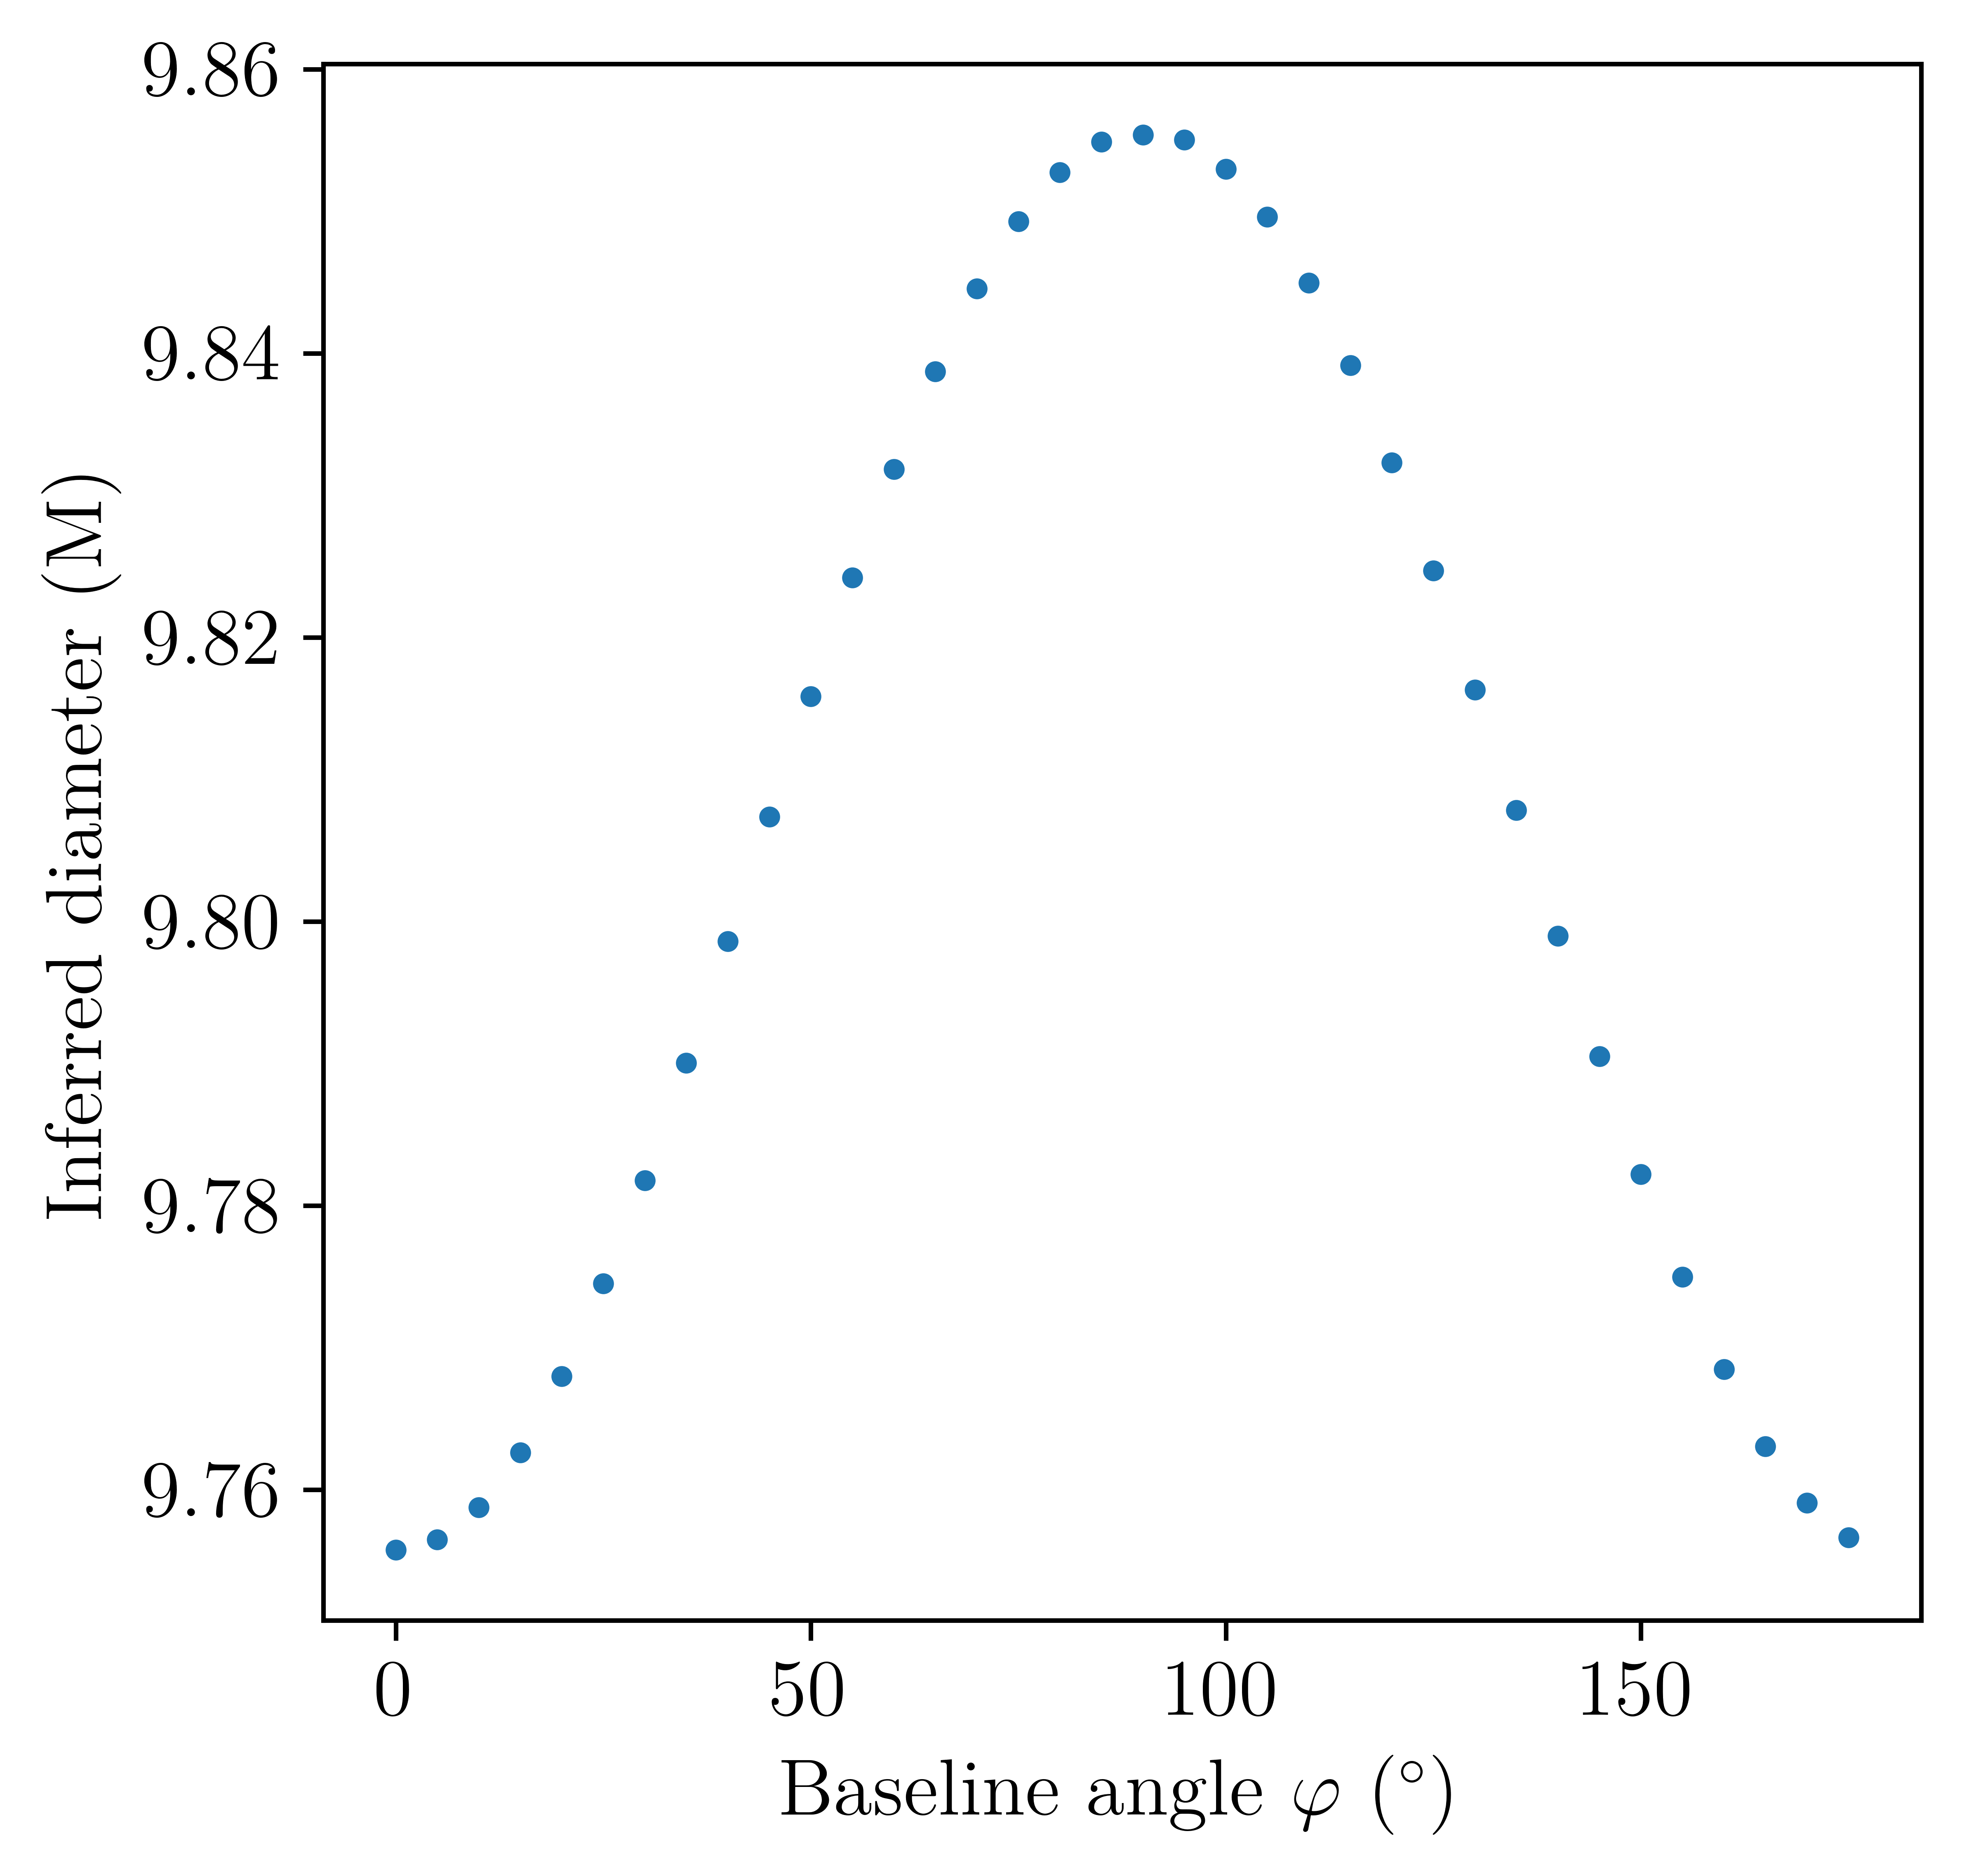

In [28]:
fig, ax = plt.subplots(figsize=[5,5],dpi=1000)
ax.scatter(radonangles, best_circlipse/M_to_muas, s=7)
plt.xlabel('Baseline angle $\\varphi$ $(^\circ)$', size=14)
plt.ylabel("Inferred diameter (M)", size=14)

## Inferring the photon ring shape from the most probable circlipse

In [29]:
def d_fit(x, r0, r1, r2, phi0):
        return 2*r0 + 2*np.sqrt((r1**2)*(np.sin(x-phi0)**2)+(r2**2)*(np.cos(x-phi0)**2))

In [30]:
params, pcov_v = curve_fit(d_fit, radonangles*np.pi/180, best_circlipse)

In [31]:
print(params)

[17.77326262  1.19837321  1.39279735  1.57348973]


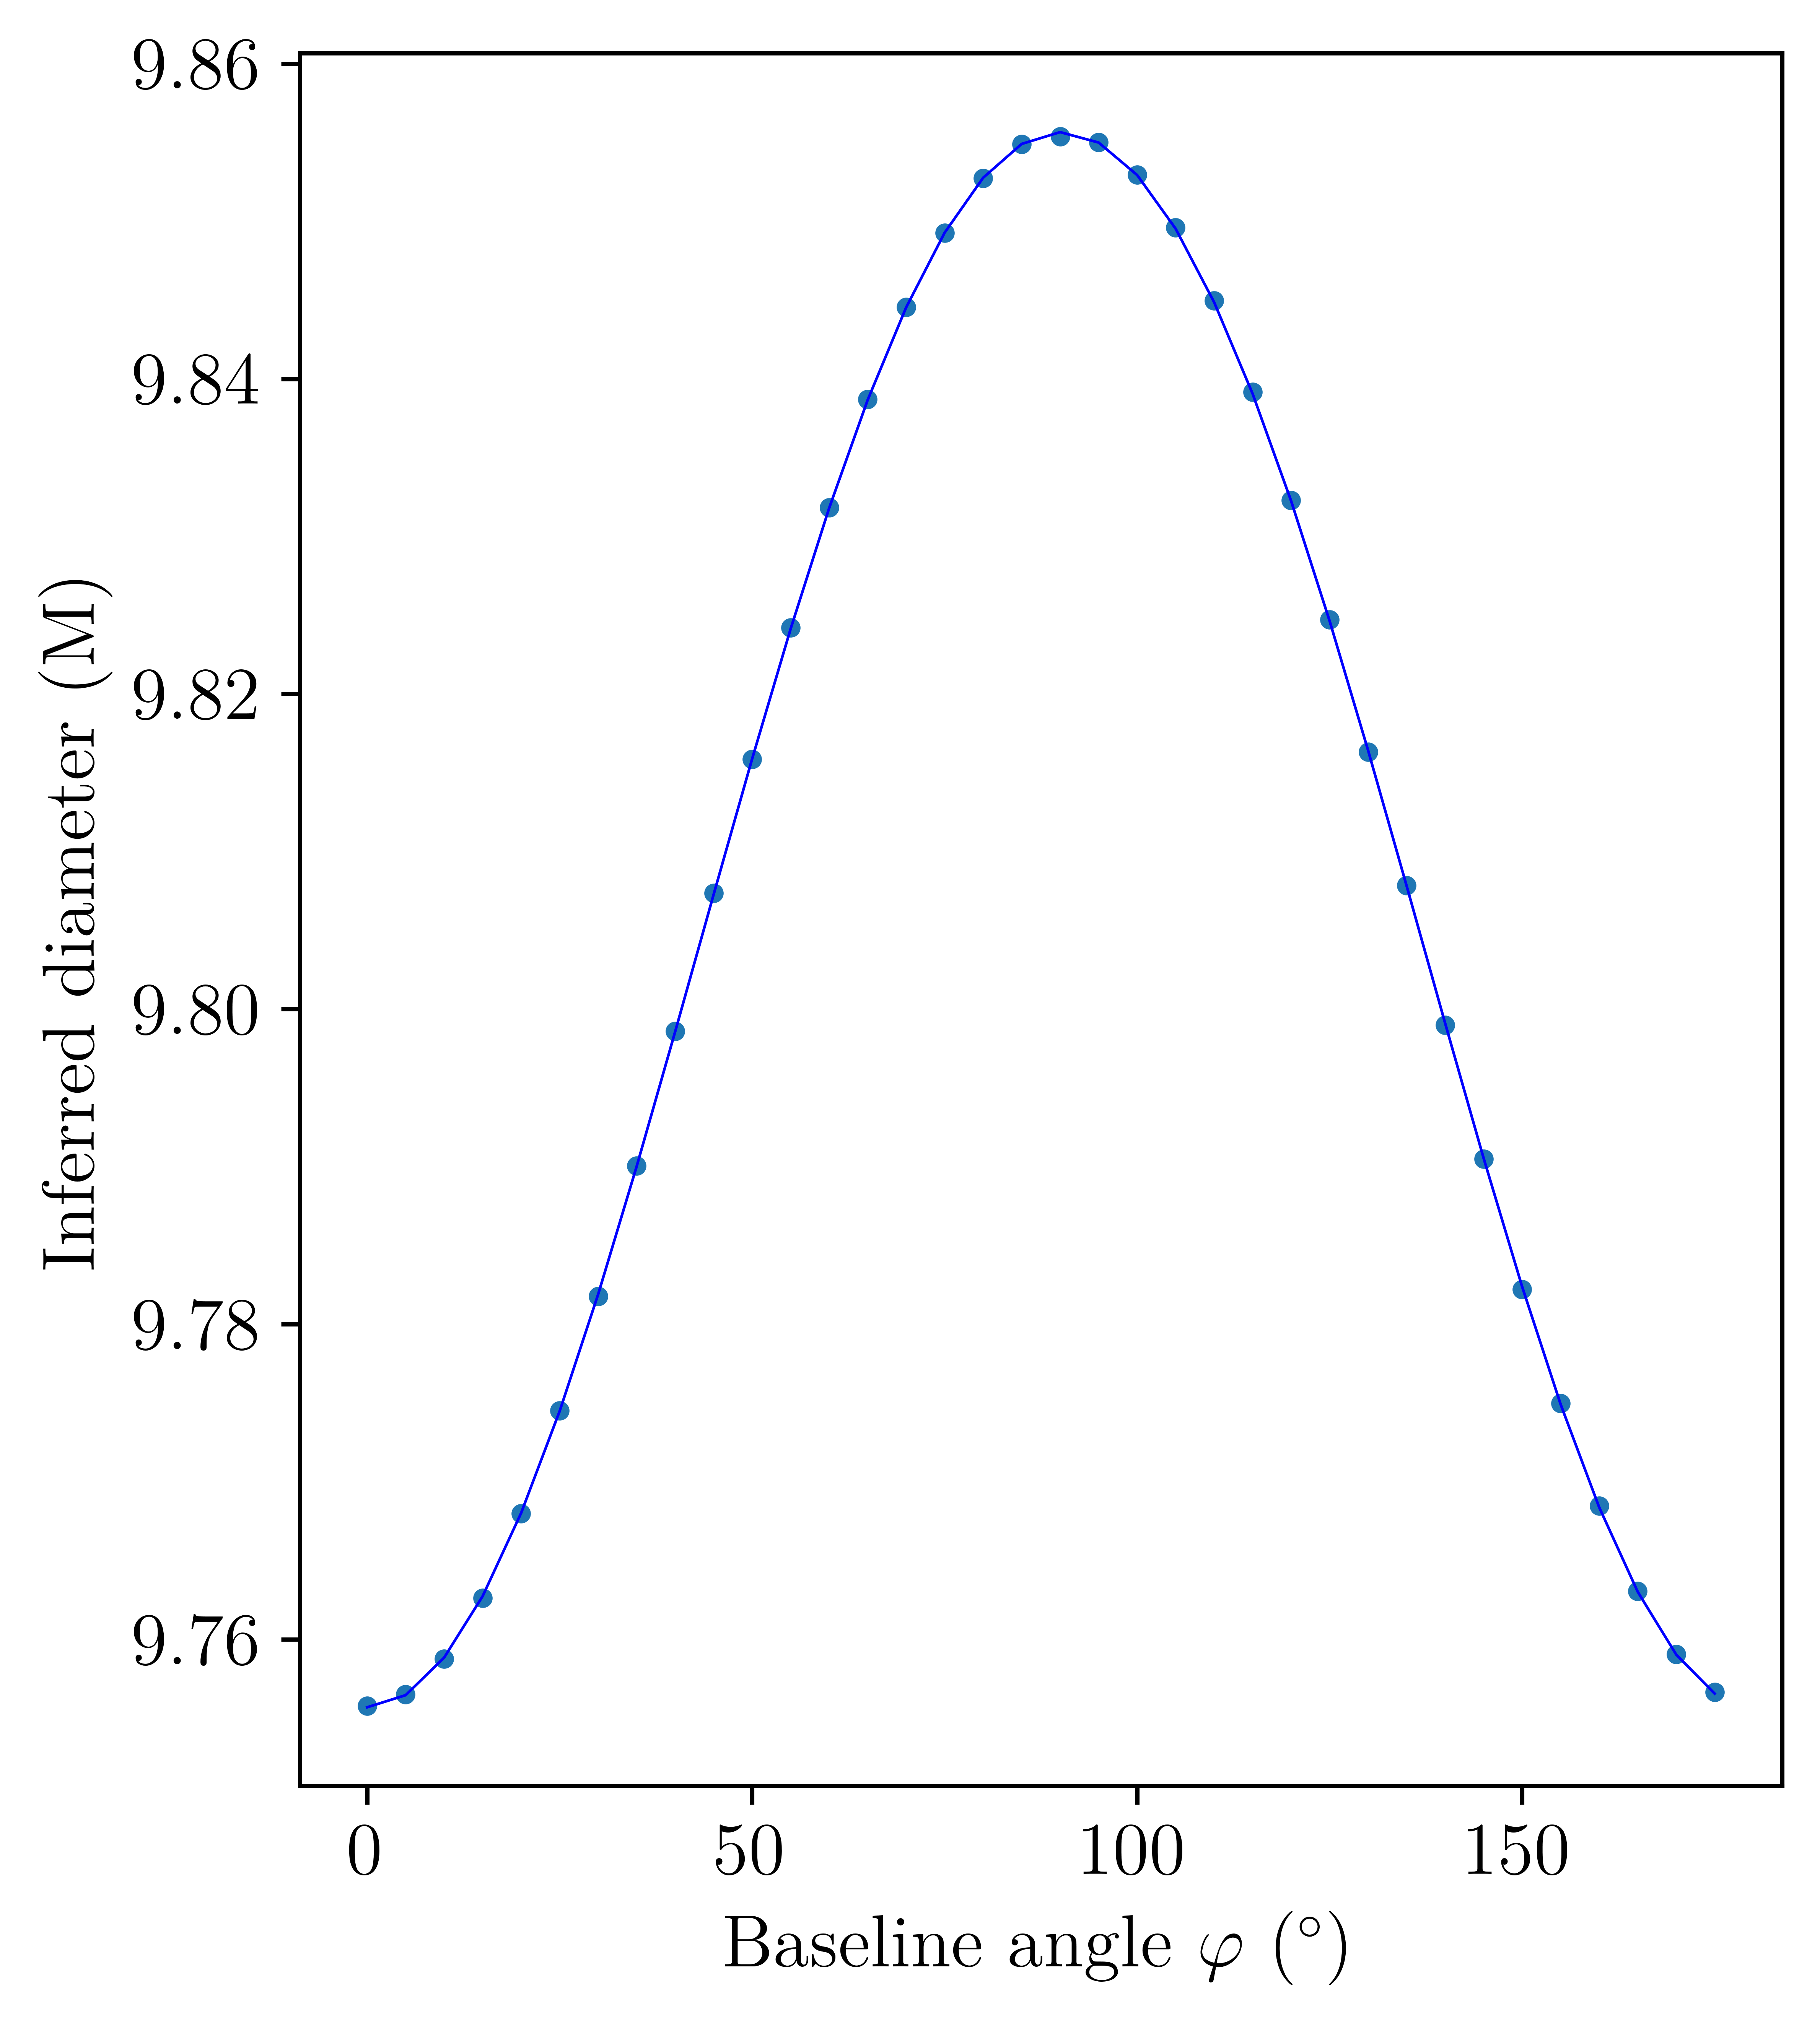

In [32]:
fig, ax = plt.subplots(figsize=[5,6],dpi=1000)
ax.scatter(radonangles, best_circlipse/M_to_muas, label="Most probable circlipse", s=7)
ax.plot(radonangles, [d_fit(phi*np.pi/180, *params)/M_to_muas for phi in radonangles], linewidth=0.5, c='b', label="d_fit")
plt.xlabel('Baseline angle $\\varphi$ $(^\circ)$', size=14)
plt.ylabel("Inferred diameter (M)", size=14)
plt.savefig('circlipse_spin_94_ex.pdf',dpi=1000,bbox_inches='tight')

In [33]:
def RMSD(parameters, x, y):
    deviation = 0
    avg_v_fit = 0
    for i in range(0, len(x)):
        deviation= deviation + (d_fit(x[i], *parameters)-abs(y[i]))**2
        avg_d_fit = avg_v_fit + d_fit(x[i], *parameters)
    return np.sqrt(deviation/len(x))/(avg_d_fit/len(x))

In [34]:
R_0 = params[0]
R_1 = params[1]
R_2 = params[2]
phi0 = params[3]

In [35]:
d_1=2*(R_0+R_2)/M_to_muas
d_2=2*(R_0+R_1)/M_to_muas
d_perp=min(d_1, d_2)  ## d_perp <= d_para
d_para=max(d_1, d_2)
# fractional asymmetry
f_a = 1-d_perp/d_para

In [41]:
print("d_perp = " + str(d_perp))
print("d_para = " + str(d_para))
print("f_a = " + str(100 * f_a) + "%") ## as a percentage
print("RMSD = "+'{:.2e}'.format(RMSD(params, radonangles*np.pi/180, best_circlipse)))

d_perp = 9.755684726778451
d_para = 9.85566243626449
f_a = 1.014418971150688%
RMSD = 3.17e-04
